In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols

In [2]:
resale_prices = pd.read_csv('given_hdb/resale-flat-prices-based-on-approval-date-1990-onwards.csv', parse_dates=['month'])

# Looking at the data on their own

In [3]:
resale_prices

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [17]:
display('Resale prices head')
display(resale_prices.head())
display('Basic stats of the resale prices')
display(resale_prices.describe(include='all'))
display('Checking if there is any missing/null values')
display(resale_prices.isnull().sum())

'Resale prices head'

month        town flat_type block       street_name storey_range  \
0 1990-01-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1 1990-01-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2 1990-01-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3 1990-01-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4 1990-01-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            31.0        IMPROVED                 1977        9000.0  
1            31.0        IMPROVED                 1977        6000.0  
2            31.0        IMPROVED                 1977        8000.0  
3            31.0        IMPROVED                 1977        6000.0  
4            73.0  NEW GENERATION                 1976       47200.0

'Basic stats of the resale prices'

month      town flat_type   block     street_name  \
count                769807    769807    769807  769807          769807   
unique                  338        27         8    2196             546   
top     1999-03-01 00:00:00  TAMPINES    4 ROOM       2  YISHUN RING RD   
freq                   6480     69301    285625    4128           15330   
first   1990-01-01 00:00:00       NaN       NaN     NaN             NaN   
last    2018-02-01 00:00:00       NaN       NaN     NaN             NaN   
mean                    NaN       NaN       NaN     NaN             NaN   
std                     NaN       NaN       NaN     NaN             NaN   
min                     NaN       NaN       NaN     NaN             NaN   
25%                     NaN       NaN       NaN     NaN             NaN   
50%                     NaN       NaN       NaN     NaN             NaN   
75%                     NaN       NaN       NaN     NaN             NaN   
max                     NaN       NaN       NaN     NaN             NaN   

       storey_range  floor_area_sqm flat_model  lease_commence_date  \
count        769807   769807.000000     769807        769807.000000   
unique           25             NaN         34                  NaN   
top        04 TO 06             NaN    Model A                  NaN   
freq         196459             NaN     138619                  NaN   
first           NaN             NaN        NaN                  NaN   
last            NaN             NaN        NaN                  NaN   
mean            NaN       95.460607        NaN          1986.573794   
std             NaN       26.207883        NaN             8.861167   
min             NaN       28.000000        NaN          1966.000000   
25%             NaN       72.000000        NaN          1980.000000   
50%             NaN       93.000000        NaN          1985.000000   
75%             NaN      114.000000        NaN          1993.000000   
max             NaN      307.000000        NaN          2015.000000   

        resale_price  
count   7.698070e+05  
unique           NaN  
top              NaN  
freq             NaN  
first            NaN  
last             NaN  
mean    2.825671e+05  
std     1.426142e+05  
min     5.000000e+03  
25%     1.750000e+05  
50%     2.650000e+05  
75%     3.700000e+05  
max     1.180000e+06

'Checking if there is any missing/null values'

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [ ]:
# So what we know now is that there are no missing/null values
# But we have another problem where the data of resold flats are in months but the rest are by year
# Time to reshape the data

In [ ]:
# Reshaping the data and cleaning

In [20]:
# Creating map to map town by regions
def splitRegion(region_str, region):
    arr = region_str.upper()
    arr = arr.split(', ')
    arr = {i:region for i in arr}
    return arr

north = 'Admirality, Kranji, Woodlands, Sembawang, Yishun, Yio Chu Kang, Seletar, Sengkang'
north = splitRegion(north, 'north')

south = 'Holland, Queenstown, Bukit Merah, Telok Blangah, Pasir Panjang, Sentosa, Bukit Timah, Newton, Orchard, City, Marina South'
south = splitRegion(south, 'south')

east = 'Serangoon, Punggol, Hougang, Tampines, Pasir Ris, Loyang, Simei, Kallang, Katong, East Coast, Macpherson, Bedok, Pulau Ubin, Pulau Tekong'
east = splitRegion(east, 'east')

west = 'Lim Chu Kang, Choa Chu Kang, Bukit Panjang, Tuas, Jurong East, Jurong West, Jurong Industrial Estate, Bukit Batok, Hillview, West Coast, Clementi'
west = splitRegion(west, 'west')

central = 'Thomson, Marymount, Sin Ming, Ang Mo Kio, Bishan, Serangoon Gardens, MacRitchie, Toa Payoh'
central = splitRegion(central, 'central')

all_regions = {**north, **south, **east, **west, **central}

In [21]:
# Here we are reshaping the resale data to be by year
resale_prices = resale_prices.replace({'MULTI-GENERATION': 'MULTI GENERATION'})
df_resale = resale_prices.groupby([pd.Grouper(freq='Y', key='month'), 'town', 'flat_type', 'storey_range', 'lease_commence_date'])['resale_price', 'floor_area_sqm'].mean().reset_index()

# Creating the regions column
df_resale['regions'] = df_resale['town'].map(all_regions)
# 'Creating the column year left on lease
df_resale['lease_years_left'] = 99 - 2020 + df_resale['lease_commence_date']

# Creating price per sqm
df_resale['price_per_sqm'] = df_resale['resale_price'] / df_resale['floor_area_sqm']
display(df_resale.head())

month        town flat_type storey_range  lease_commence_date  \
0 1990-12-31  ANG MO KIO    1 ROOM     01 TO 03                 1977   
1 1990-12-31  ANG MO KIO    1 ROOM     04 TO 06                 1977   
2 1990-12-31  ANG MO KIO    1 ROOM     07 TO 09                 1977   
3 1990-12-31  ANG MO KIO    1 ROOM     10 TO 12                 1977   
4 1990-12-31  ANG MO KIO    2 ROOM     01 TO 03                 1986   

   resale_price  floor_area_sqm  regions  lease_years_left  price_per_sqm  
0   7150.000000            31.0  central                56     230.645161  
1   7500.000000            31.0  central                56     241.935484  
2   7866.666667            31.0  central                56     253.763441  
3   8266.666667            31.0  central                56     266.666667  
4  26700.000000            45.0  central                65     593.333333

[None, None, None, None, None, None, None, None]

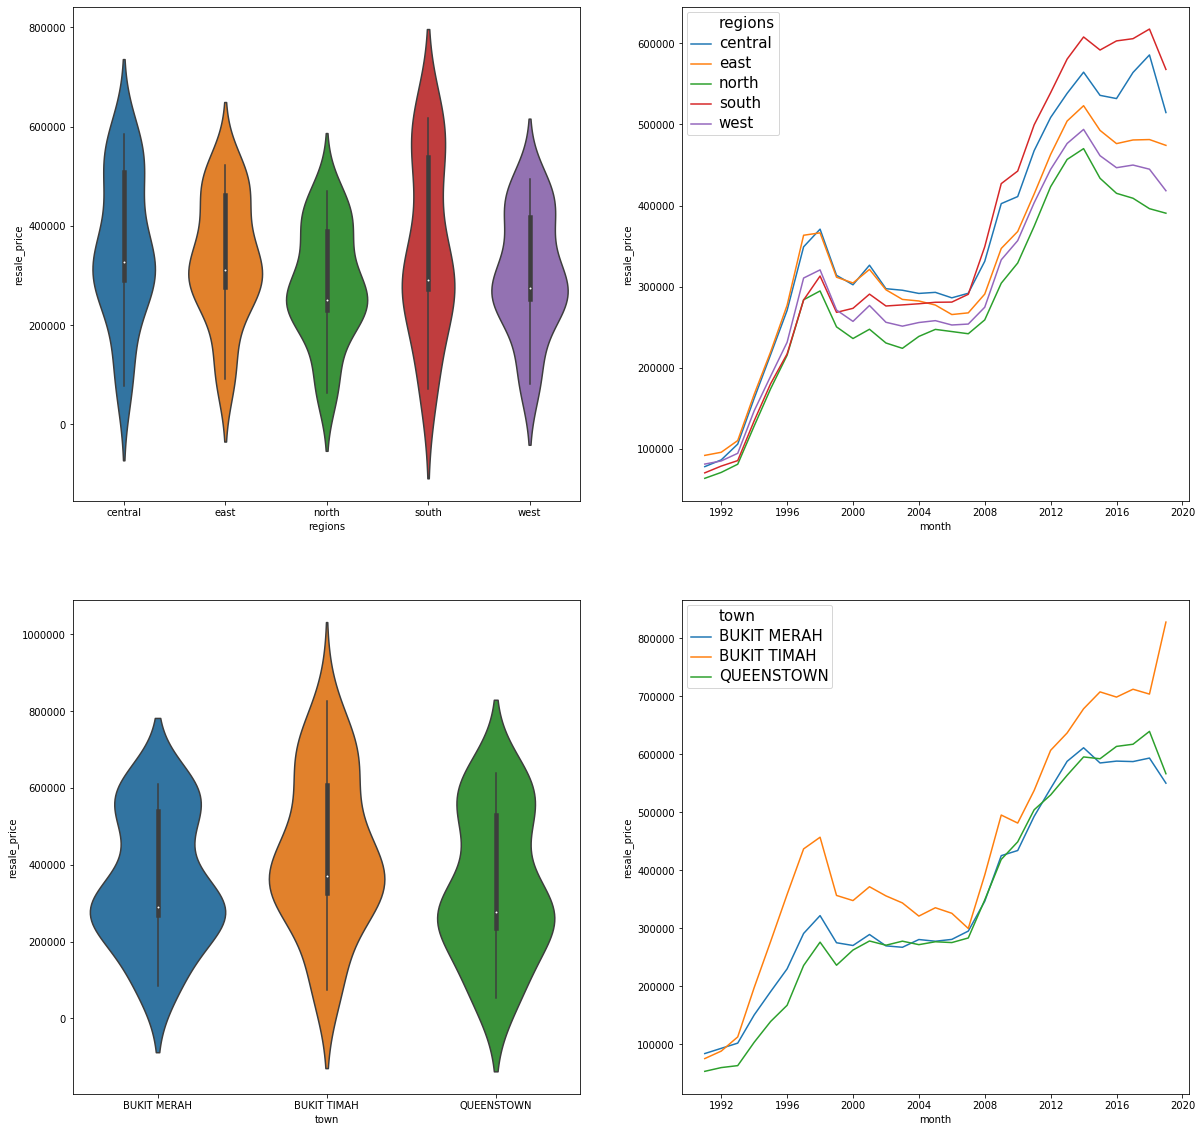

In [22]:
by_regions = df_resale.groupby(['month', 'regions'])['resale_price'].mean().reset_index()
pct_region = by_regions.pivot(index='month', columns='regions').pct_change().dropna().reset_index().melt(id_vars='month').drop([None], axis=1)

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.violinplot(x='regions', y='resale_price', data=by_regions, ax=ax[0][0])
sns.lineplot(x='month', y='resale_price', data=by_regions, hue='regions', ax=ax[0][1])
plt.setp(ax[0][1].get_legend().get_texts(), fontsize='15')

only_south = df_resale[df_resale['regions'] == 'south'].groupby(['month', 'town'])['resale_price'].mean().reset_index()

sns.violinplot(x='town', y='resale_price', data=only_south, ax=ax[1][0])
sns.lineplot(x='month', y='resale_price', data=only_south, hue='town', ax=ax[1][1])
plt.setp(ax[1][1].get_legend().get_texts(), fontsize='15')

# From lineplot, on the top right we can see that the starting prices in these areas are about the same at the start.
# However, we can see overtime that the prices have been increasing
# Also, they seem to generally have the same trends over time as well, as we can see the lines are quite similar
# However, after a while we can see property in the south gradually becomes more expensive than the other regions.
# Note, towards the end, we can see that top 2 regions south and centeral have started to decrease quite sharply, but still remain above the other regions.
# This could be either that demand in these regions is decreasing.
# BUt based on previous trends, the other regions will also follow suit.

# Looking at the violinplot, we can see that the south is the longest, with the largest range.
# It means it has the most variablility, but we note that this is probably due to the prices increasing much more than the rest

# Bukit timah is largest and is increasing
# Other seem to be bi-modal
# Bukit timah increase seems more consistent

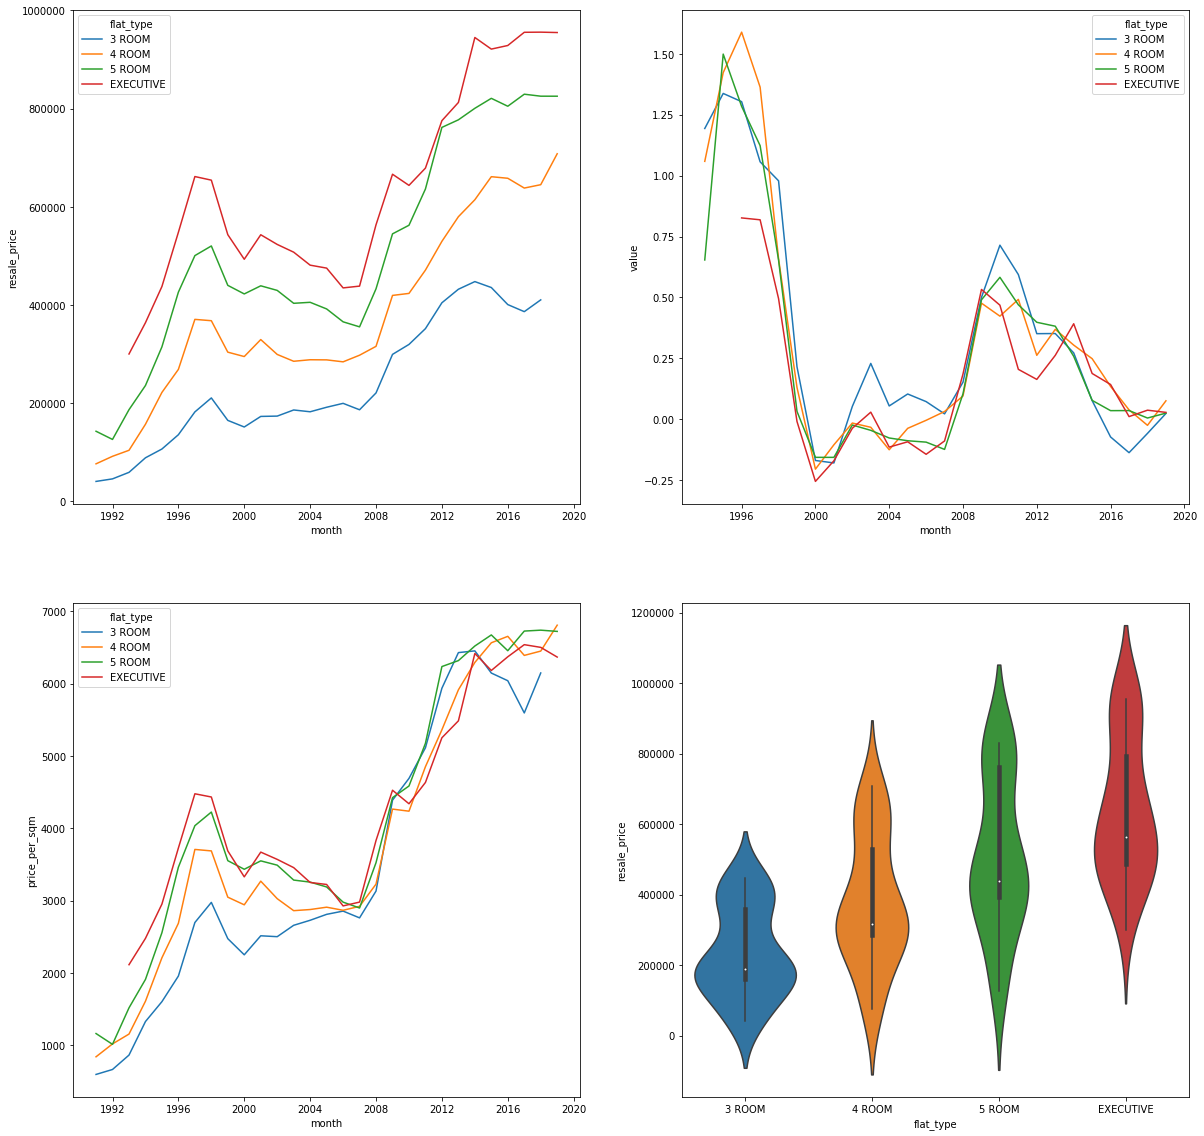

In [23]:
confirm_town = df_resale[df_resale['town'] == 'BUKIT TIMAH']
df_flat_type = confirm_town.groupby(['month', 'flat_type'])['resale_price', 'price_per_sqm'].mean().reset_index()
pct_change_flat = df_flat_type.pivot(index='month', columns='flat_type')['resale_price'].pct_change(periods=3).reset_index().melt(id_vars='month')

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.lineplot(x='month', y='resale_price', data=df_flat_type, hue='flat_type', ax=ax[0][0])
sns.lineplot(x='month', y='value', data=pct_change_flat , hue='flat_type', ax=ax[0][1])

sns.lineplot(x='month', y='price_per_sqm', data=df_flat_type, hue='flat_type', ax=ax[1][0])
sns.violinplot(x='flat_type', y='resale_price', data=df_flat_type, ax=ax[1][1])


# a = df_flat_type.pivot(index='month', columns='flat_type')['price_per_sqm'].pct_change(periods=3).reset_index().melt(id_vars='month')

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# sns.lineplot(x='month', y='value', data=pct_change_flat , hue='flat_type', ax=ax)

# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# sns.lineplot(x='month', y='value', data=a , hue='flat_type', ax=ax)

# Same thing here, we can see that the flat types seem to all have the same general trend
# Note executive sharp increase, after 5-room sharp increase
# Look at %change in price. Other than 3, the rest seem to be about the same
# Middle where 5-room and executive difference?
# Looking at worth, we can 4-room and 5-room are most worth

# 3-room fluctuates the most

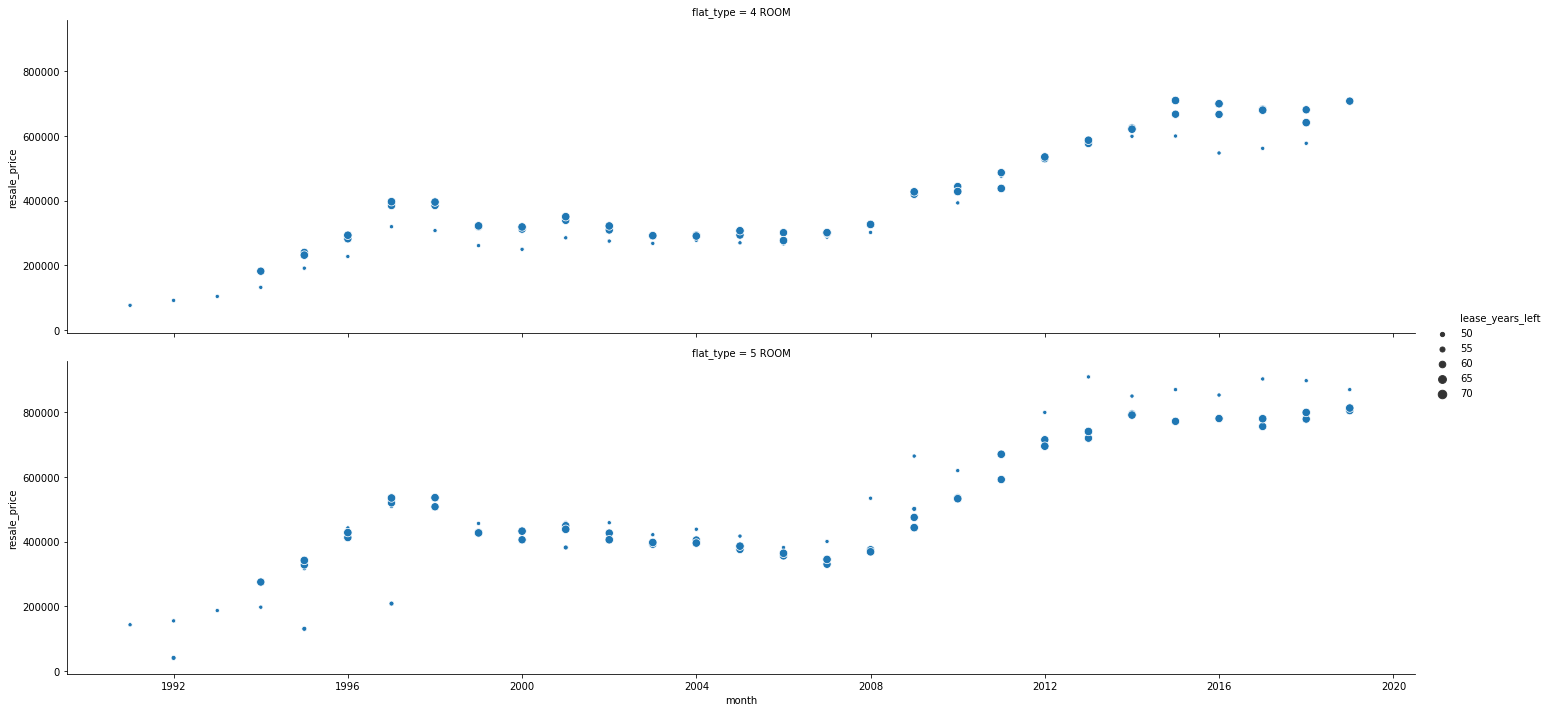

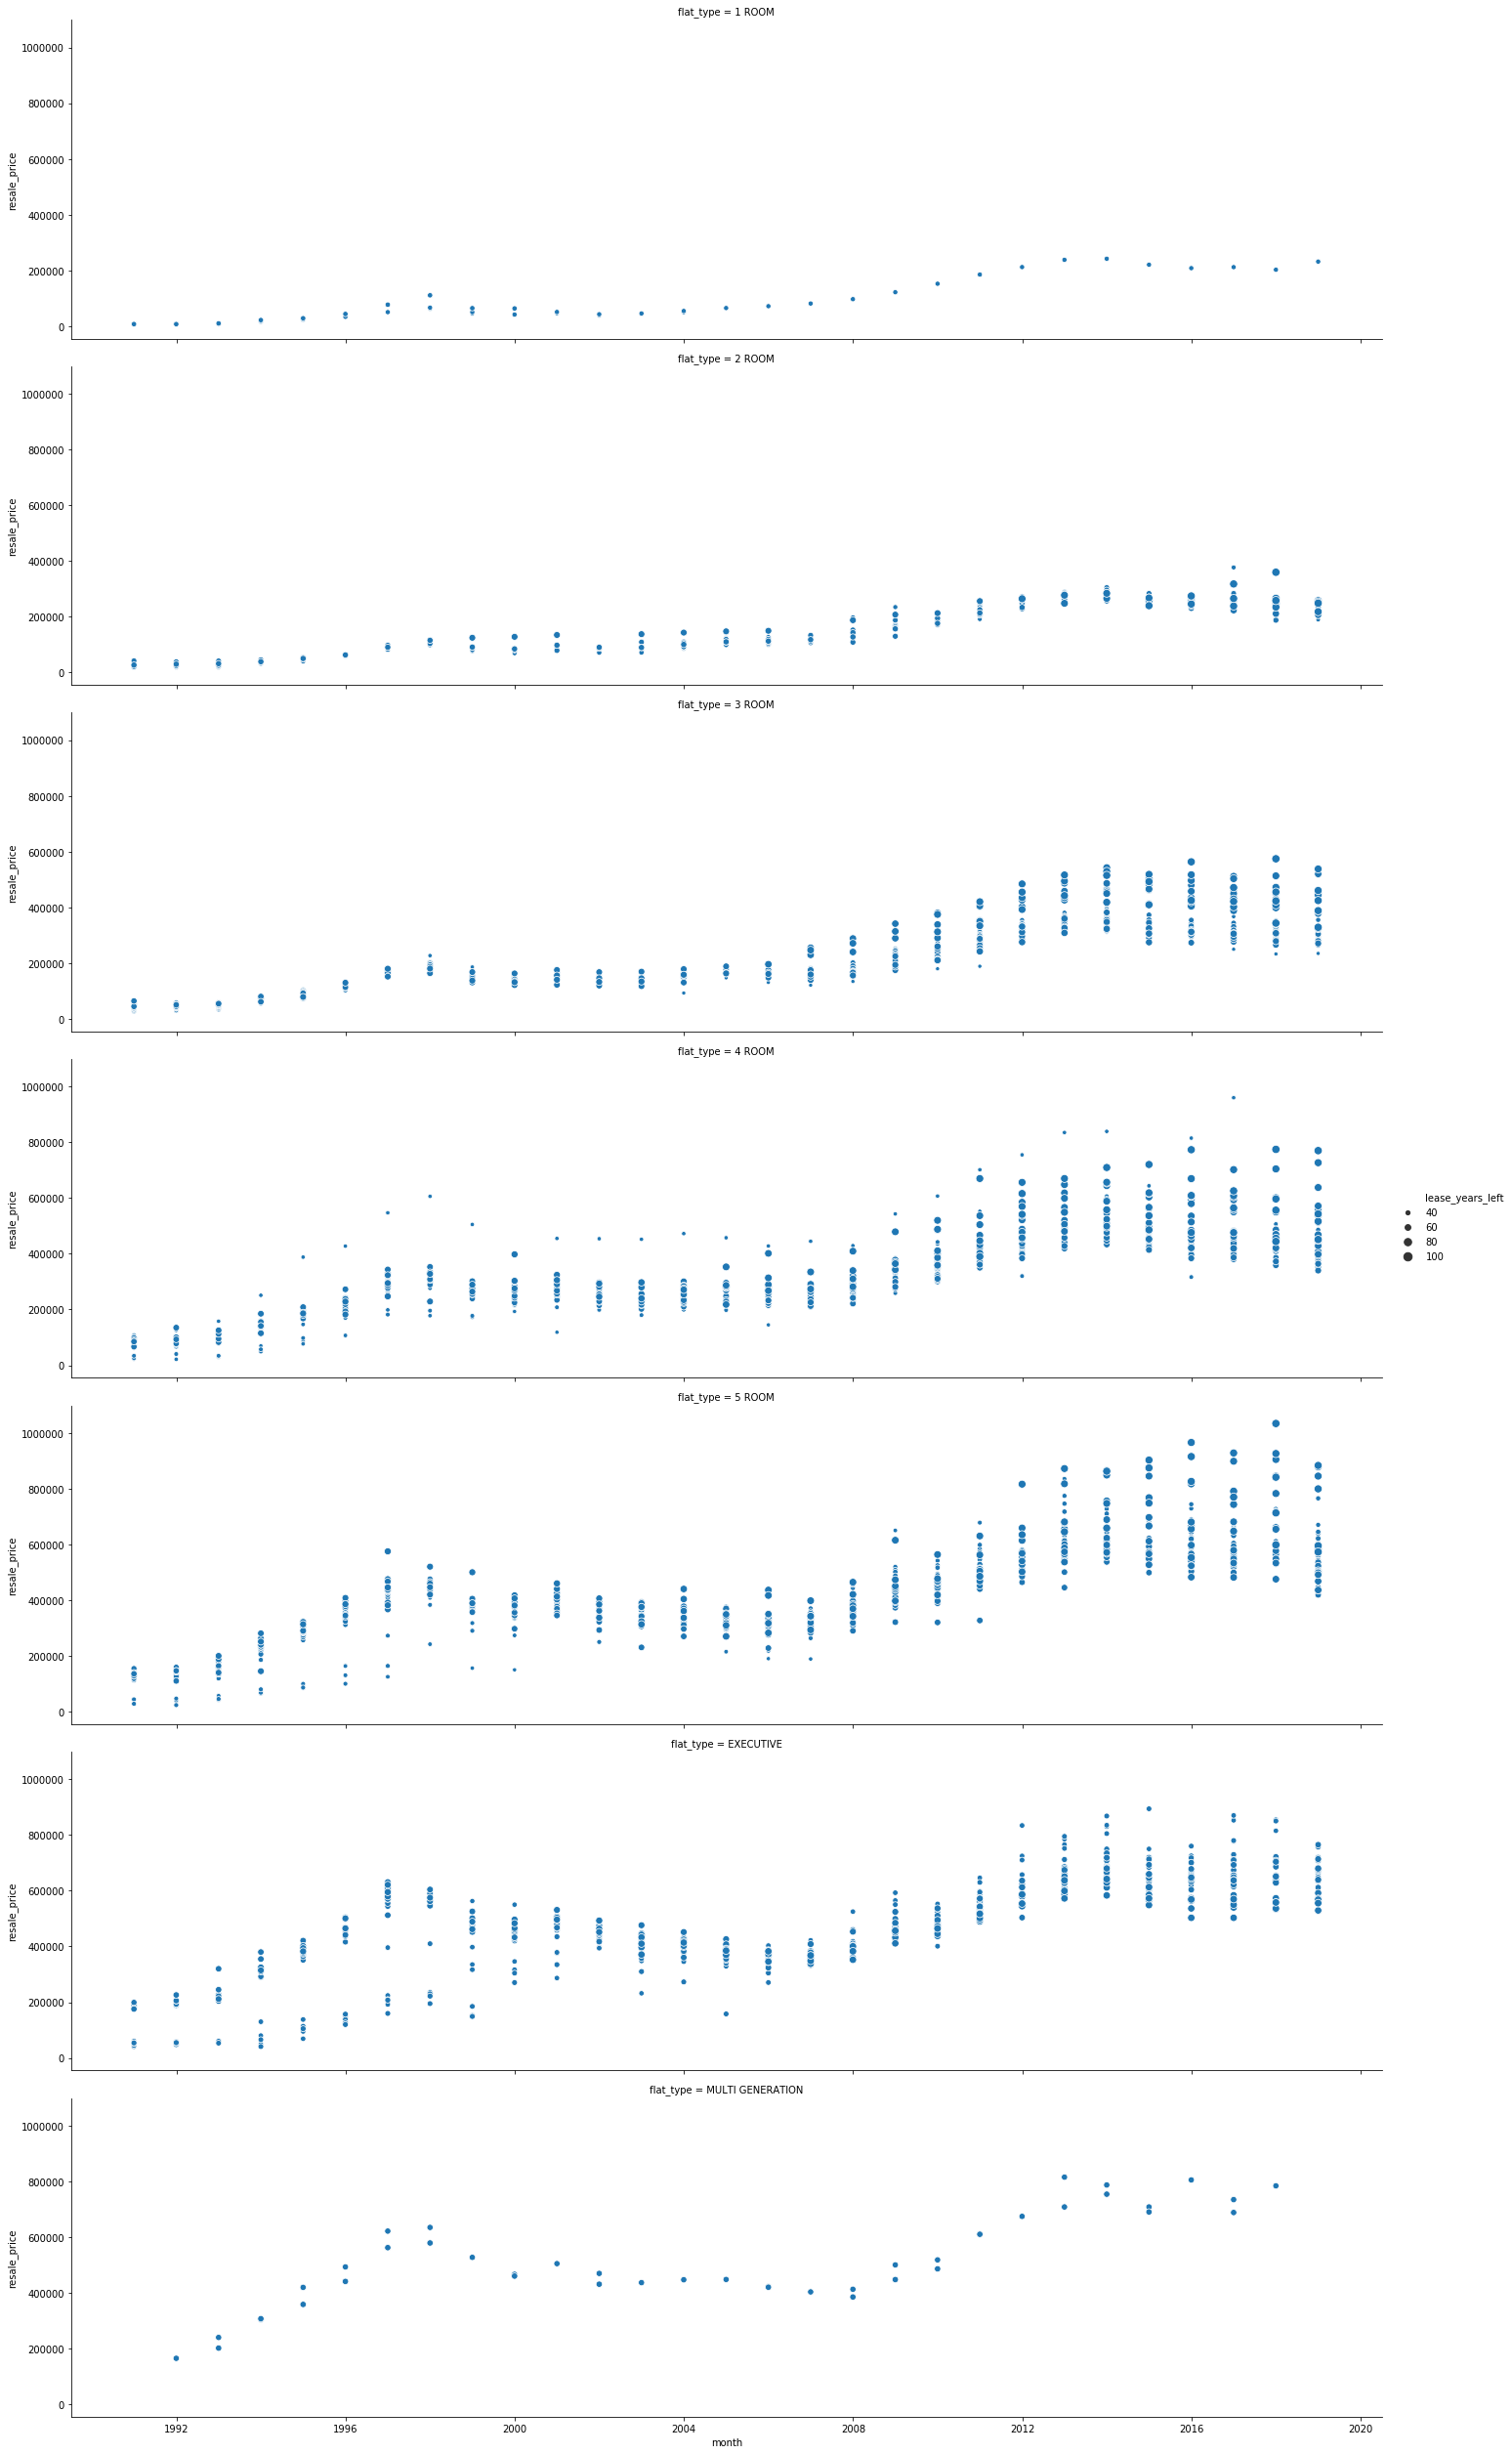

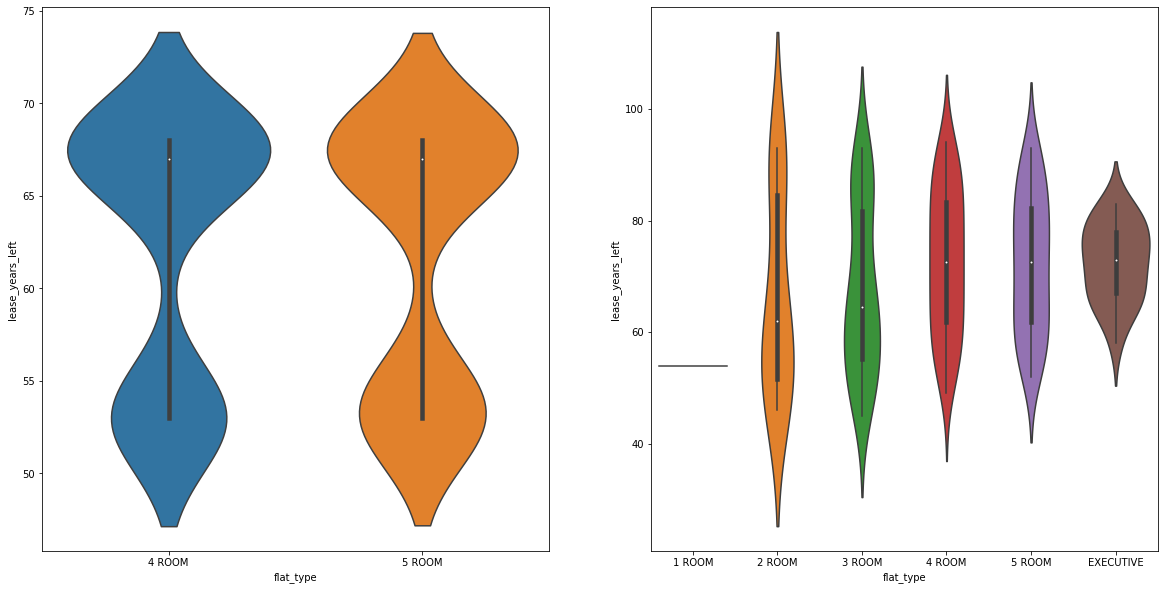

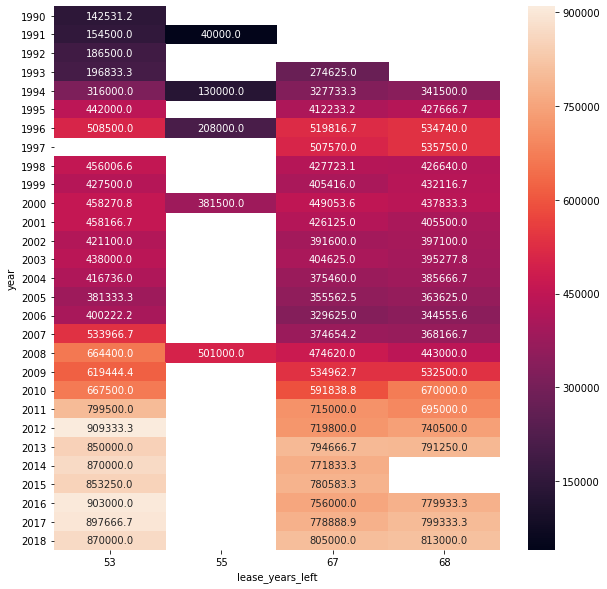

In [24]:
r_4 = confirm_town['flat_type'] == '4 ROOM'
r_5 = confirm_town['flat_type'] == '5 ROOM'
r = r_4 | r_5
confirm_t_f = confirm_town[r]
a = confirm_t_f.groupby(['month', 'flat_type', 'lease_years_left'])['resale_price', 'price_per_sqm'].mean().reset_index()
b = df_resale.groupby(['month', 'flat_type', 'lease_years_left'])['resale_price'].mean().reset_index()
g = sns.relplot(x='month', y='resale_price', row='flat_type', data=a, aspect=4, size='lease_years_left')
g = sns.relplot(x='month', y='resale_price', row='flat_type', data=b, aspect=4, size='lease_years_left')

c = b[b['month'] > '2018']
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.violinplot('flat_type', 'lease_years_left', data=a, ax=ax[0])
sns.violinplot('flat_type', 'lease_years_left', data=c, ax=ax[1])

# a.pivot('month', 'lease_years_left', 'resale_price')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
a['year'] = a[a['flat_type'] == '5 ROOM']['month'].dt.strftime('%Y')
d = a[a['flat_type'] == '5 ROOM'].pivot('year', 'lease_years_left', 'resale_price')
sns.heatmap(d, annot=True, fmt='.1f', ax=ax)

# g = sns.FacetGrid(data=a, row='flat_type', aspect=4, height=4)
# g.map(sns.scatterplot, 'month', 'resale_price', size='lease_years_left')

# sns.scatterplot(x='lease_years_leftt', y='resale_price', hue='flat_type', data=a)
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# sns.scatterplot('lease_years_left', 'resale_price', 'flat_type', data=b, ax=ax)



# sns.relplot('lease_years_left', 'resale_price', row='flat_type', data=a, aspect=4, kind='scatter')
# for flat_type in b['flat_type'].unique():
#     df = b[b['flat_type'] == flat_type]
#     df = df.pivot('month', 'lease_years_left', 'resale_price')
#     if flat_type == '4 ROOM':
#         c = df

# sns.heatmap(c, annot=True)
# g.add_legend()

# 5-roomflat prices for room with long lease cheaper
# we can see that is only 1 dot, outlier
# Based on the all houses, we can see that longer lease remaining are more expensive
# want longer lease cause staying in the house for family
# Distro is more long lease remaining

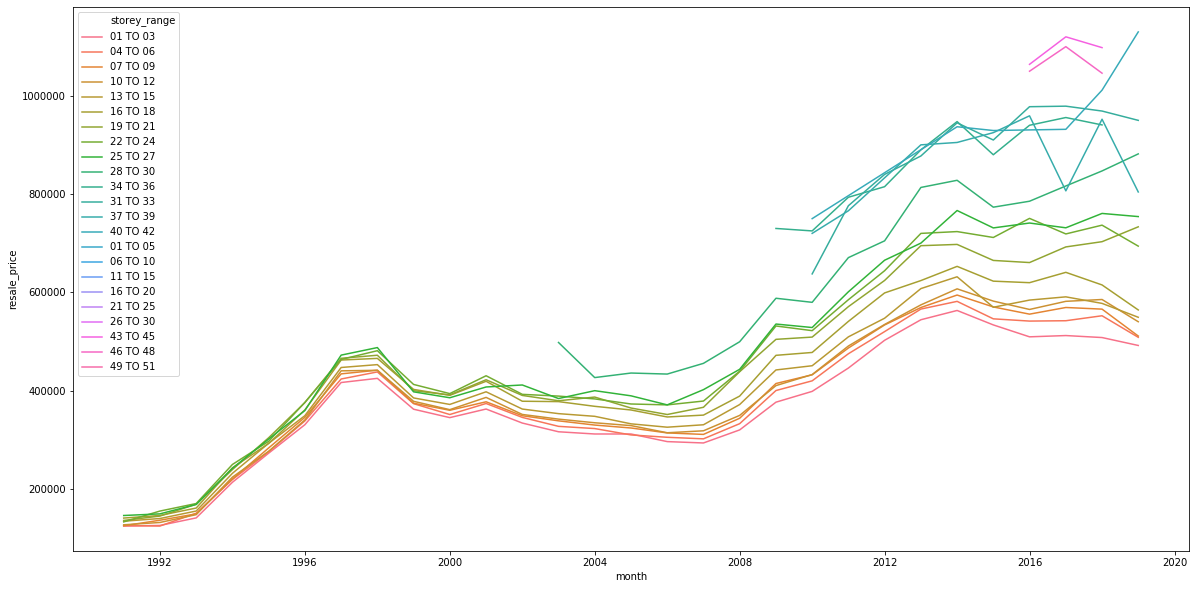

In [102]:
a = df_resale[df_resale['flat_type'] == '5 ROOM']
a.groupby(['month', 'storey_range'])['resale_price'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot('month', 'resale_price', data=a, hue='storey_range', ax=ax, ci=None)

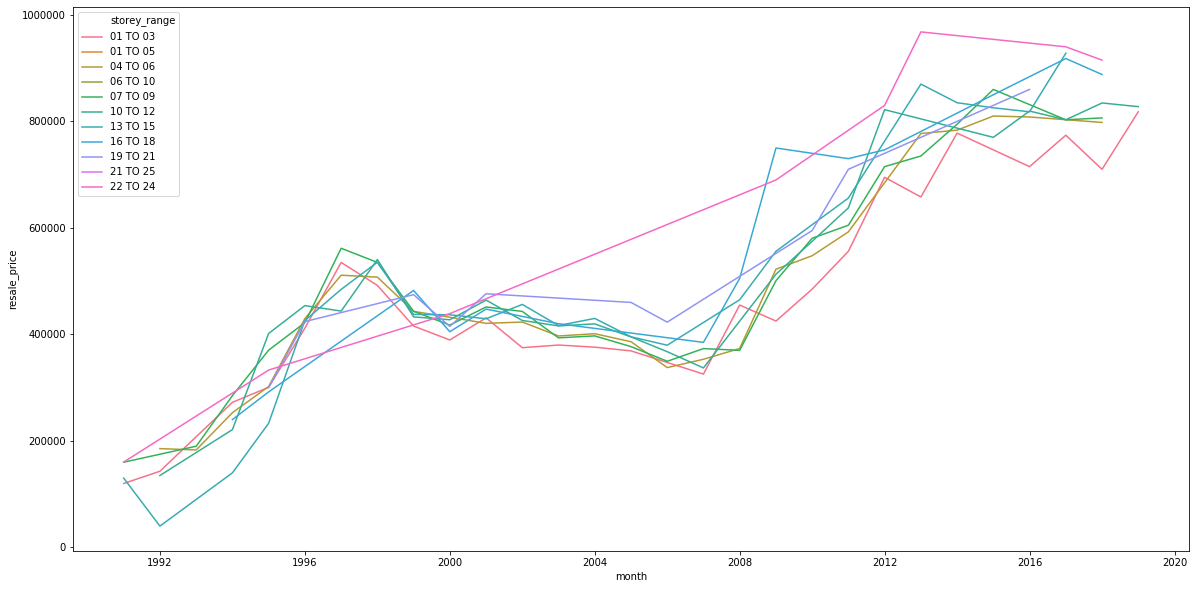

In [120]:
a = confirm_t_f[confirm_t_f['flat_type'] == '5 ROOM']
b = a.groupby(['month', 'storey_range'])['resale_price'].mean().reset_index()
b = b.sort_values(by='storey_range')
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot('month', 'resale_price', data=b, hue='storey_range', ax=ax)

# BREAKKKKKKKKKKKKKKk

In [7]:
# Here we are reshaping the resale data to be by year
df_resale = resale_prices.groupby([pd.Grouper(freq='Y', key='month'), 'town', 'flat_type', 'storey_range'])['resale_price', 'floor_area_sqm'].mean().reset_index()
df_resale = df_resale.replace({'MULTI-GENERATION': 'MULTI GENERATION'})
# Keeping the original grouping of by month
df_resale_month = resale_prices.replace({'MULTI-GENERATION': 'MULTI GENERATION'})
df_resale_month = df_resale_month.drop(['street_name'], axis=1)
# Then we make sure all the flat_models are upper case
display(df_resale.head())
display(df_resale_month.head())

month        town flat_type storey_range  resale_price  floor_area_sqm
0 1990-12-31  ANG MO KIO    1 ROOM     01 TO 03   7150.000000            31.0
1 1990-12-31  ANG MO KIO    1 ROOM     04 TO 06   7500.000000            31.0
2 1990-12-31  ANG MO KIO    1 ROOM     07 TO 09   7866.666667            31.0
3 1990-12-31  ANG MO KIO    1 ROOM     10 TO 12   8266.666667            31.0
4 1990-12-31  ANG MO KIO    2 ROOM     01 TO 03  26700.000000            45.0

month        town flat_type block storey_range  floor_area_sqm  \
0 1990-01-01  ANG MO KIO    1 ROOM   309     10 TO 12            31.0   
1 1990-01-01  ANG MO KIO    1 ROOM   309     04 TO 06            31.0   
2 1990-01-01  ANG MO KIO    1 ROOM   309     10 TO 12            31.0   
3 1990-01-01  ANG MO KIO    1 ROOM   309     07 TO 09            31.0   
4 1990-01-01  ANG MO KIO    3 ROOM   216     04 TO 06            73.0   

       flat_model  lease_commence_date  resale_price  
0        IMPROVED                 1977        9000.0  
1        IMPROVED                 1977        6000.0  
2        IMPROVED                 1977        8000.0  
3        IMPROVED                 1977        6000.0  
4  NEW GENERATION                 1976       47200.0

In [138]:
# Doing the same thing for population of resident
# Cleaning up missing values by removing them
median_rent = median_rent.replace({'na': None, '-': None})
# Dropping rows with missing values
median_rent = median_rent.dropna()
# Changing the rent type back to int
median_rent = median_rent.astype({'median_rent': 'int32'})
# Grouping by years instead of quarter
df_rent = median_rent.groupby([pd.Grouper(freq='Y', key='quarter'), 'town', 'flat_type'])['median_rent'].mean().reset_index()

# Replacing the flat type format to use resale format
format_dict = dict(zip(['3-RM', '4-RM', '5-RM', 'EXEC', '2-RM'], ['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM']))
df_rent = df_rent.replace(format_dict)

display(df_rent)

quarter        town  flat_type  median_rent
0    2005-12-31  ANG MO KIO     3 ROOM   800.000000
1    2005-12-31  ANG MO KIO     4 ROOM   941.666667
2    2005-12-31       BEDOK     3 ROOM   800.000000
3    2005-12-31       BEDOK     4 ROOM   916.666667
4    2005-12-31       BEDOK     5 ROOM  1033.333333
...         ...         ...        ...          ...
1161 2019-12-31   WOODLANDS  EXECUTIVE  2066.666667
1162 2019-12-31      YISHUN     3 ROOM  1550.000000
1163 2019-12-31      YISHUN     4 ROOM  1800.000000
1164 2019-12-31      YISHUN     5 ROOM  2000.000000
1165 2019-12-31      YISHUN  EXECUTIVE  2066.666667

[1166 rows x 4 columns]

In [139]:
# Doing it again for flats constructed
df_flats = flats_constructed.groupby(pd.Grouper(freq='Y', key='year'))['flats_constructed'].mean().reset_index()
display(df_flats.head())

year  flats_constructed
0 1977-12-31              30498
1 1978-12-31              29742
2 1979-12-31              26709
3 1980-12-31              18421
4 1981-12-31              15381

In [140]:
# Merging the dataset based on time and town
df_all = pd.merge(df_resale, df_rent, left_on=['month', 'town', 'flat_type'], right_on=['quarter', 'town', 'flat_type'], how='inner')
df_all = pd.merge(df_all, df_flats, left_on='month', right_on='year', how='inner')
# Drooping duplicate time columns
df_all = df_all.drop(['quarter', 'year'], axis=1)
df_all['price_per_sqm'] = df_all['resale_price'] / df_all['floor_area_sqm']
df_all

month        town  flat_type storey_range   resale_price  \
0    2005-12-31  ANG MO KIO     3 ROOM     01 TO 03  169758.392694   
1    2005-12-31  ANG MO KIO     3 ROOM     04 TO 06  173853.932432   
2    2005-12-31  ANG MO KIO     3 ROOM     07 TO 09  176102.690909   
3    2005-12-31  ANG MO KIO     3 ROOM     10 TO 12  178544.518939   
4    2005-12-31  ANG MO KIO     3 ROOM     13 TO 15  173852.375000   
...         ...         ...        ...          ...            ...   
7424 2017-12-31      YISHUN  EXECUTIVE     01 TO 03  578716.000000   
7425 2017-12-31      YISHUN  EXECUTIVE     04 TO 06  581169.882353   
7426 2017-12-31      YISHUN  EXECUTIVE     07 TO 09  576000.000000   
7427 2017-12-31      YISHUN  EXECUTIVE     10 TO 12  620055.555556   
7428 2017-12-31      YISHUN  EXECUTIVE     13 TO 15  569629.333333   

      floor_area_sqm  median_rent  flats_constructed  price_per_sqm  
0          70.214612        800.0               5673    2417.707485  
1          70.800676        800.0               5673    2455.540583  
2          70.956364        800.0               5673    2481.844924  
3          70.890152        800.0               5673    2518.608229  
4          73.031250        800.0               5673    2380.520325  
...              ...          ...                ...            ...  
7424      150.277778       2300.0              35210    3850.975231  
7425      146.294118       2300.0              35210    3972.612786  
7426      145.000000       2300.0              35210    3972.413793  
7427      147.777778       2300.0              35210    4195.864662  
7428      143.666667       2300.0              35210    3964.937355  

[7429 rows x 9 columns]

# Anaylsis of what affects resale prices

In [68]:
df_resale['town'].unique().shape

(27,)

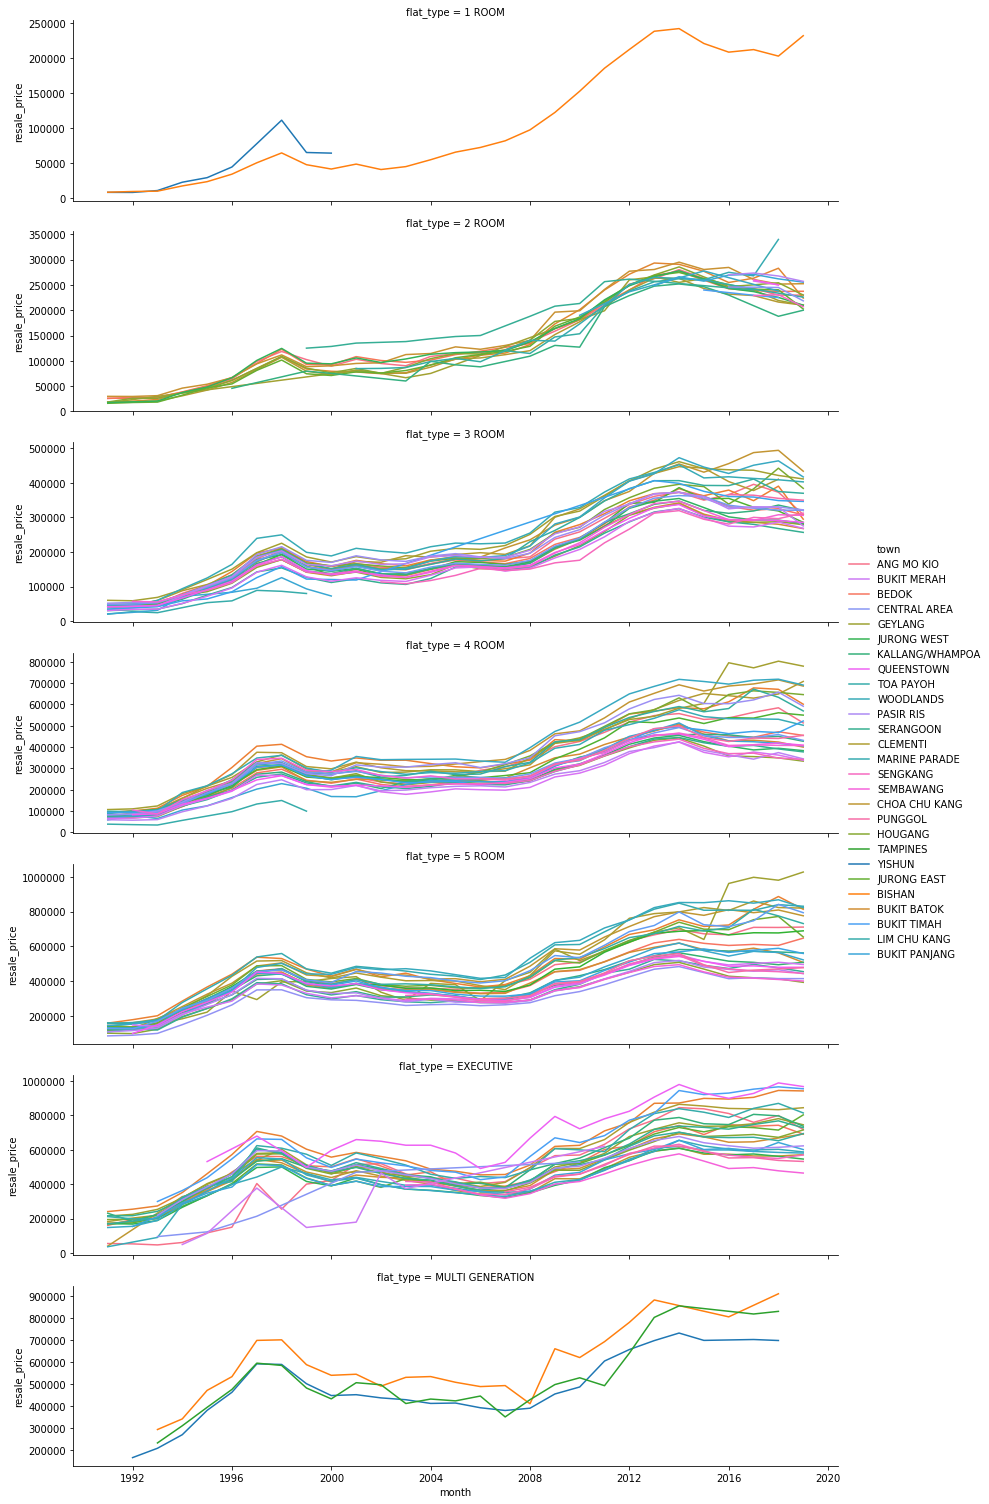

In [141]:
# Looking at only resale prices
# Feature Engineering price per sqm
df_resale['price_per_sqm'] = df_resale['resale_price'] / df_resale['floor_area_sqm']
resale_neighbour_type = df_resale.groupby(['month', 'town', 'flat_type'])['resale_price', 'floor_area_sqm', 'price_per_sqm'].mean().reset_index()
grid = sns.FacetGrid(row='flat_type', data=resale_neighbour_type, aspect=4, sharey=False)
grid.map(sns.lineplot, 'month', 'resale_price', 'town', legend='full')
grid.add_legend()

# There is also quite a large decrepency between areas of the same type of flat

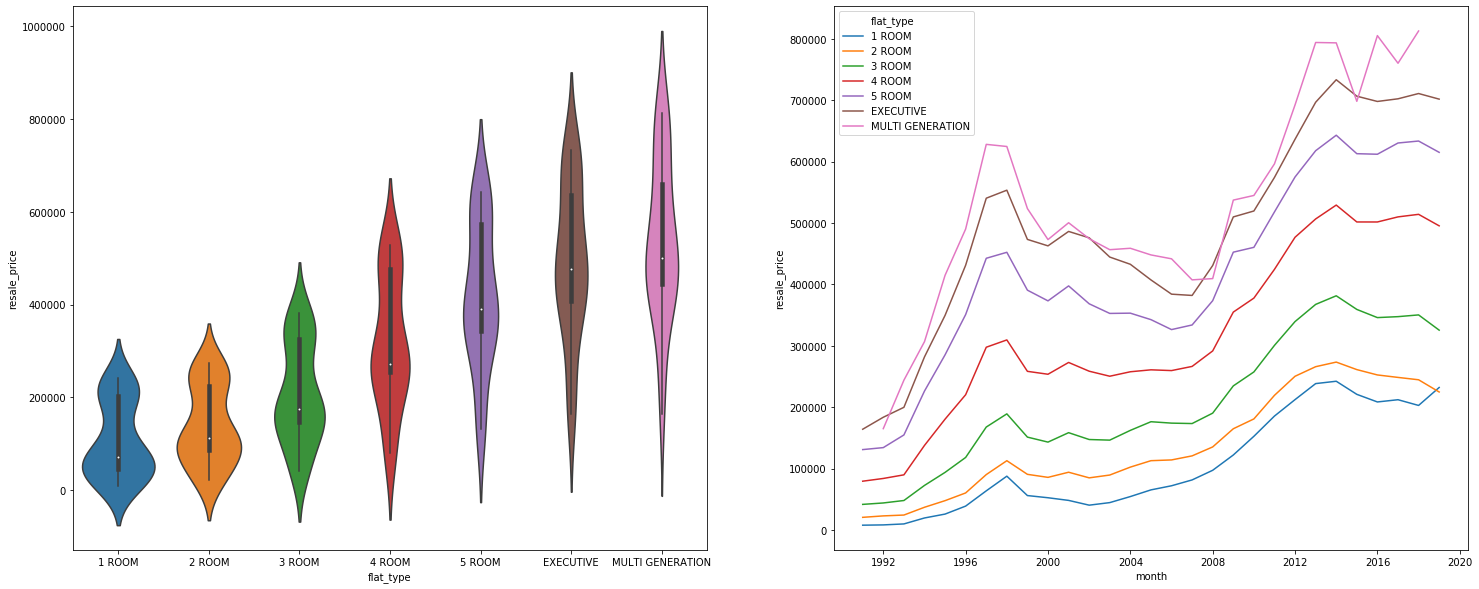

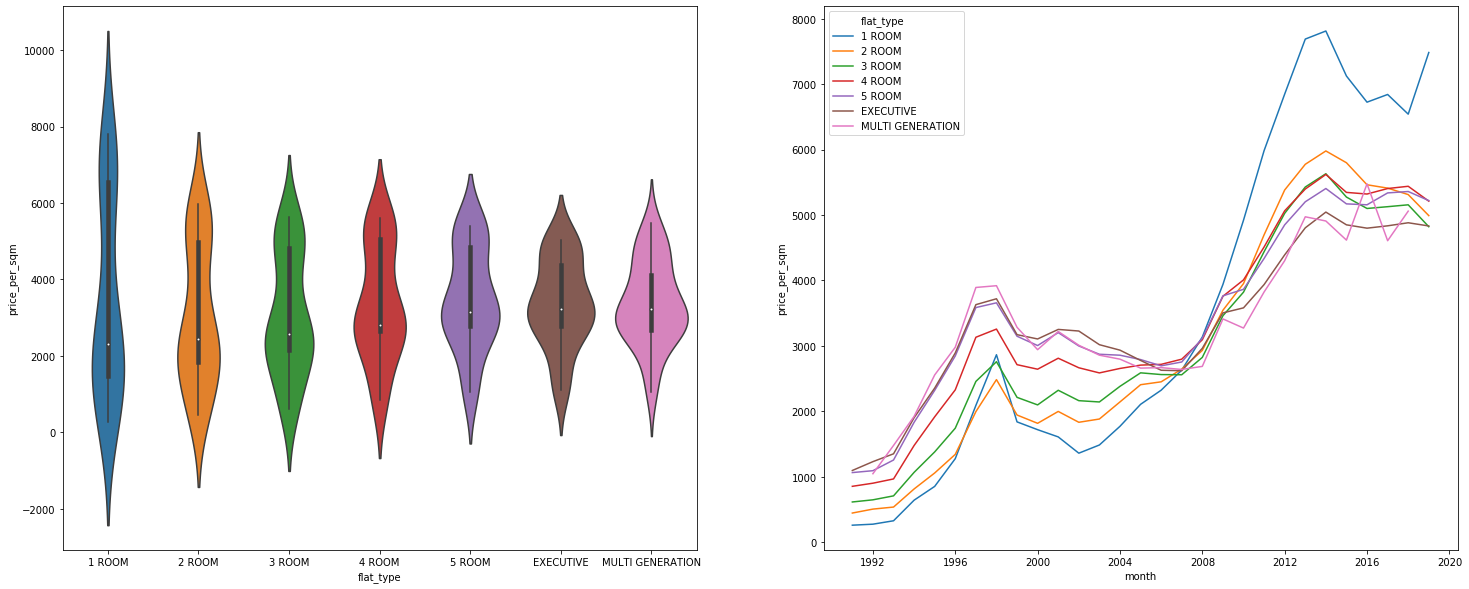

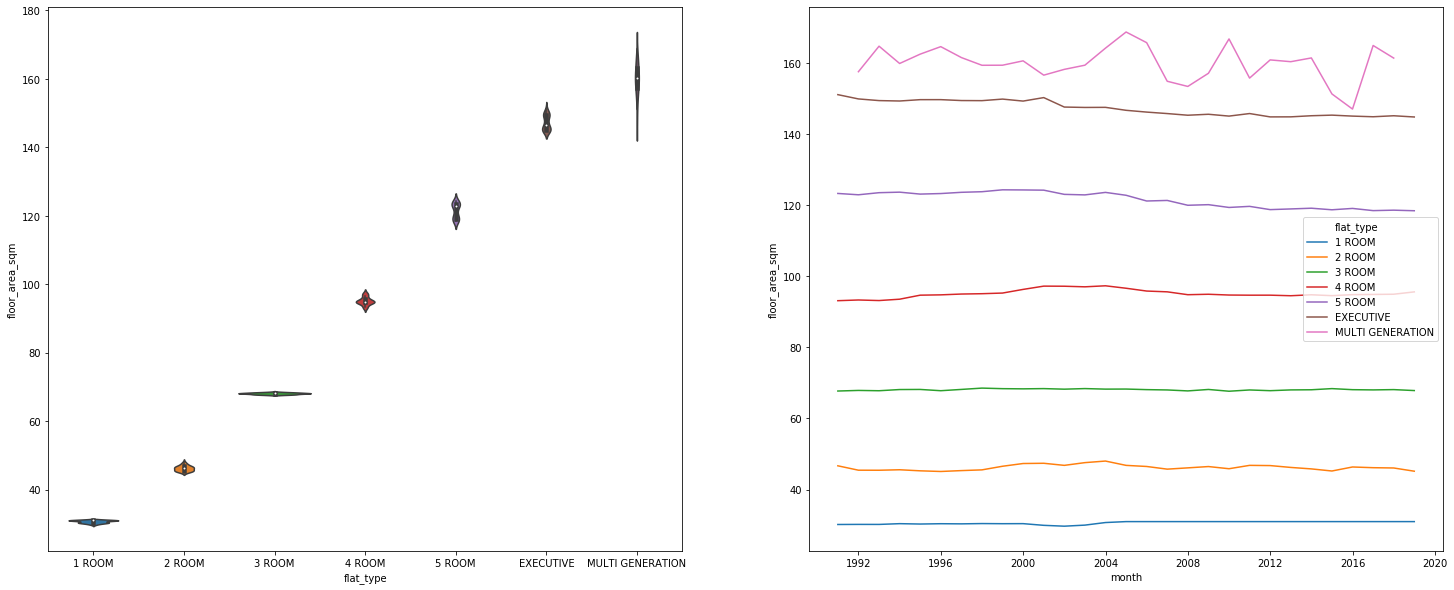

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
sns.violinplot(data=resale_neighbour_type.groupby(['month', 'flat_type'])['resale_price'].mean().reset_index(), x='flat_type', y='resale_price', ax=ax[0])
sns.lineplot(data=resale_neighbour_type.groupby(['month', 'flat_type'])['resale_price'].mean().reset_index(), x='month', y='resale_price', hue='flat_type', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(25, 10))
sns.violinplot(data=resale_neighbour_type.groupby(['month', 'flat_type'])['price_per_sqm'].mean().reset_index(), x='flat_type', y='price_per_sqm', ax=ax[0])
sns.lineplot(data=resale_neighbour_type.groupby(['month', 'flat_type'])['price_per_sqm'].mean().reset_index(), x='month', y='price_per_sqm', hue='flat_type', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(25, 10))
sns.violinplot(data=resale_neighbour_type.groupby(['month', 'flat_type'])['floor_area_sqm'].mean().reset_index(), x='flat_type', y='floor_area_sqm', ax=ax[0])
sns.lineplot(data=resale_neighbour_type.groupby(['month', 'flat_type'])['floor_area_sqm'].mean().reset_index(), x='month', y='floor_area_sqm', hue='flat_type', ax=ax[1])
# Thoughts
# Based on violinplot we can see distribution of resale prices
# 1, 2 and 3 resale prices are farely consistent
# 4, 5, executive and multi gen are more spread out
# Taking a closer look at these trends over time, we can see that they generally have the same trends over time, with the exception of multi gen
# Multi gen should be most expensive, but it was not in some times

# As for the worth, i.e. price per sqm for each type or flat, is a better estimate to see which is better to buy.
# We can see that actualy the reverse if happening as multi gen
# Start diverge then come back then diverage

# However as we see from the sqm, it did not change much over the years
# That means that the price change in the price per sqm is due to changing prices over the years
# Thus in proportion to its worth, 1 room is an outlier with it worth suddenly increasing much more than the rest

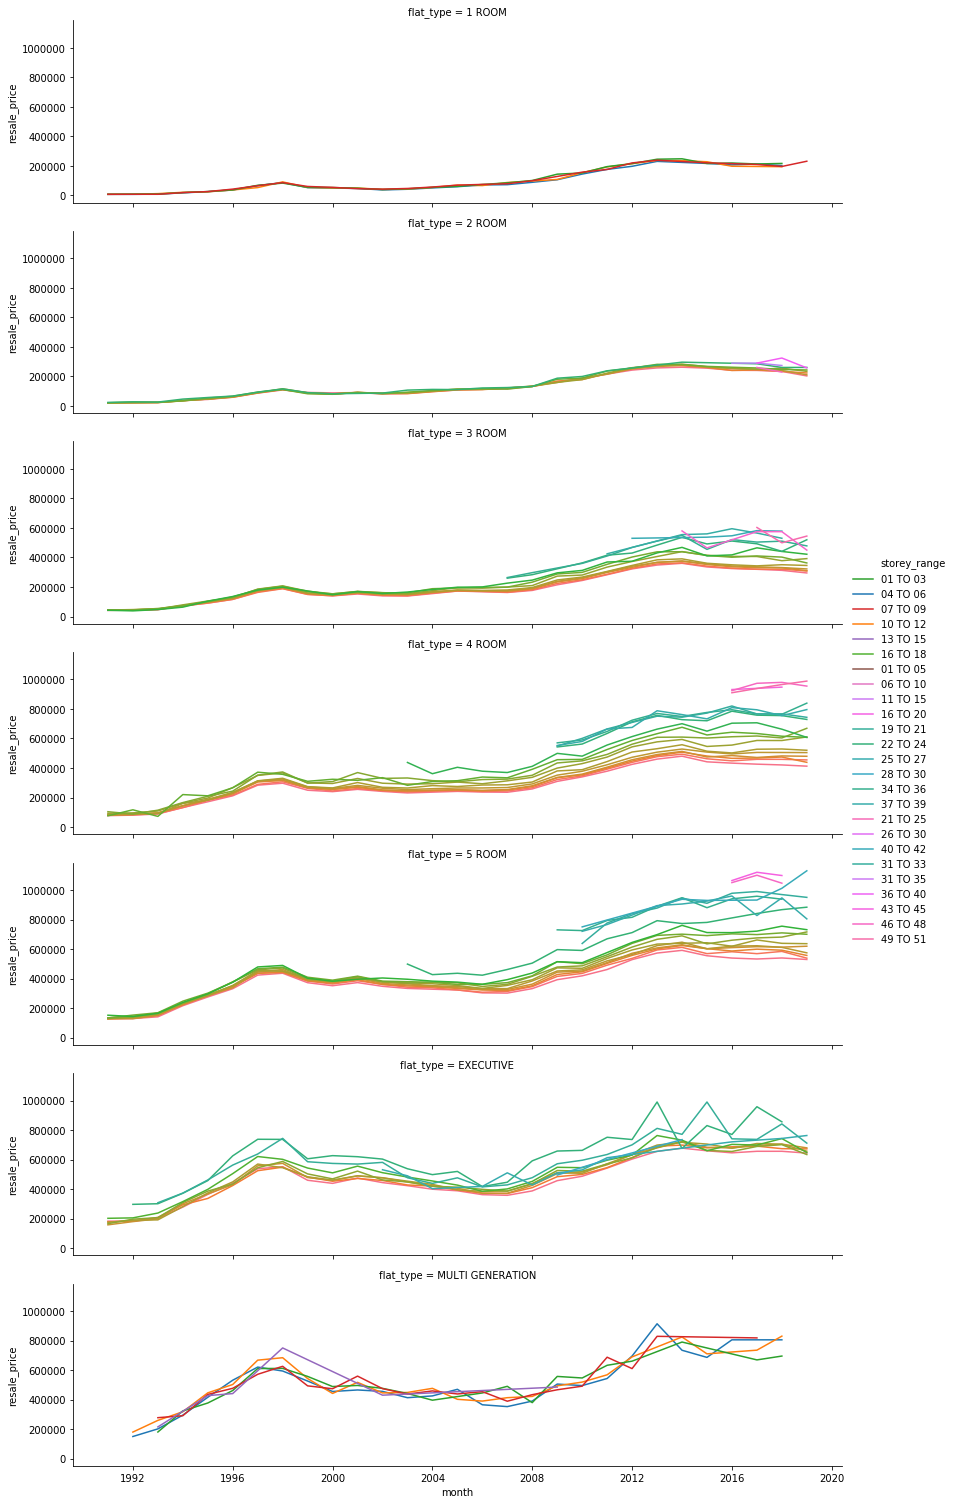

In [28]:
storey_price = df_resale.groupby(['month', 'storey_range', 'flat_type'])['resale_price'].mean().reset_index()
grid = sns.FacetGrid(data=storey_price, row='flat_type', aspect=4)
grid.map(sns.lineplot, 'month', 'resale_price', 'storey_range')
grid.add_legend()

# There is quite a large decrepency between higher floor pricing and lower floors, even though they should be around the same pricing

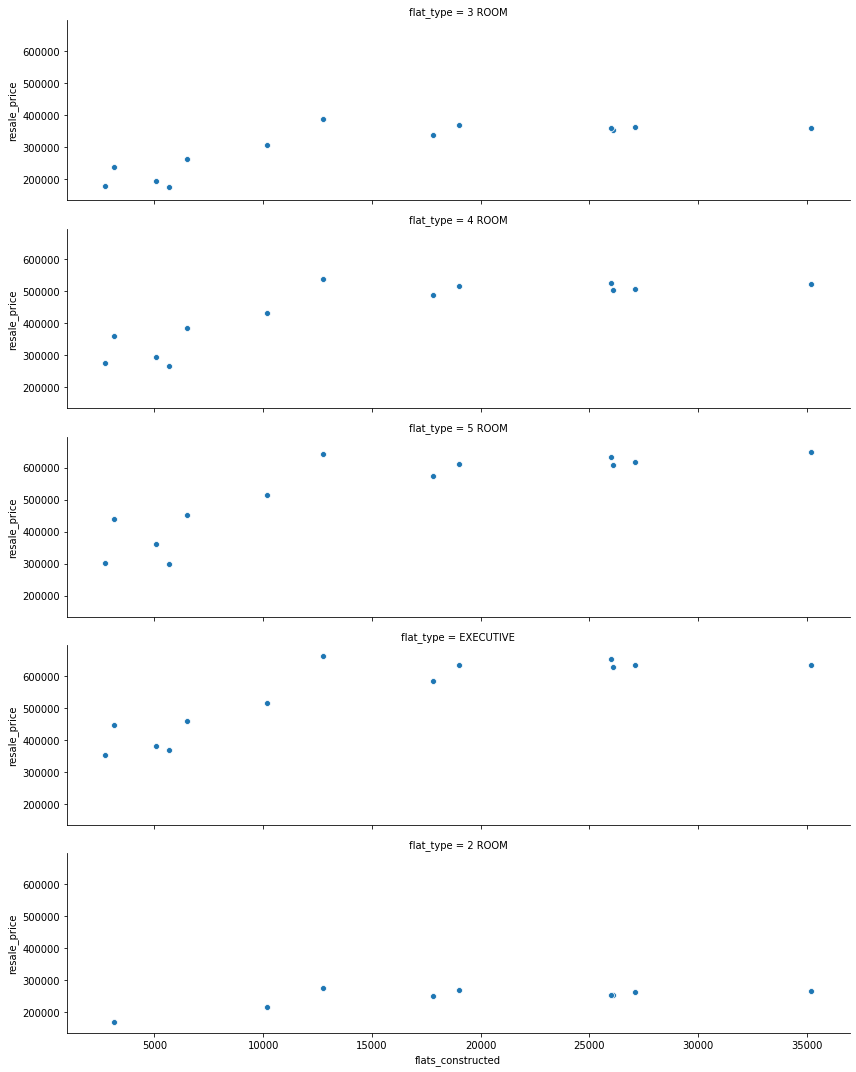

In [38]:
flats_resale = df_all.groupby(['month', 'flat_type'])['resale_price', 'flats_constructed'].mean().reset_index()
grid = sns.FacetGrid(data = flats_resale, row='flat_type', aspect=4)
grid.map(sns.scatterplot, 'flats_constructed', 'resale_price')

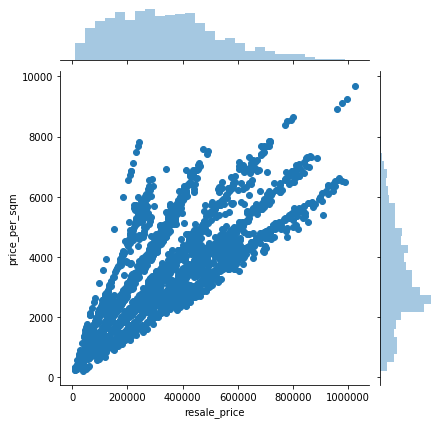

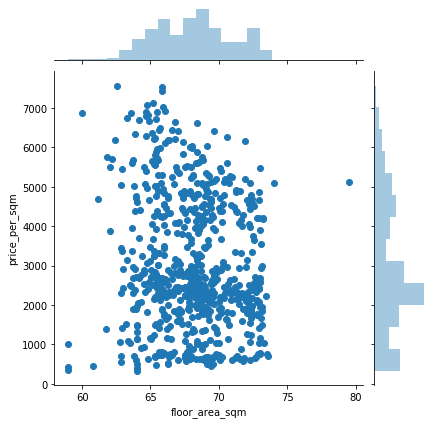

In [133]:
sns.jointplot(x='resale_price', y='price_per_sqm', data=resale_neighbour_type)
sns.jointplot(x='floor_area_sqm', y='price_per_sqm', data=resale_neighbour_type[resale_neighbour_type['flat_type'] == '3 ROOM'])

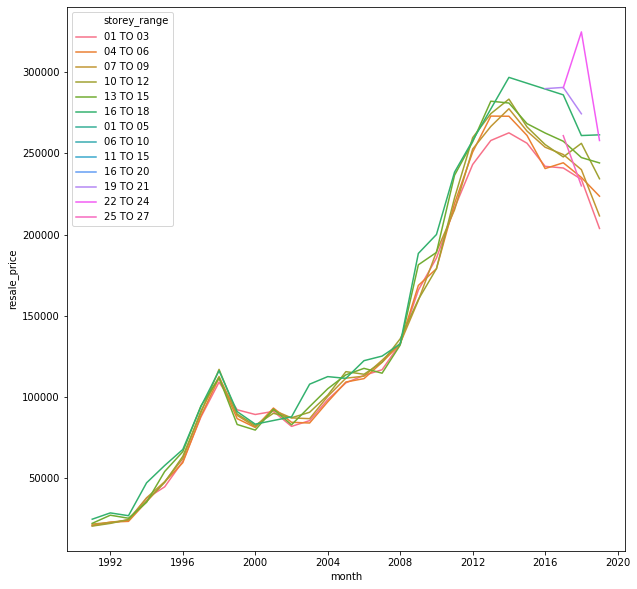

In [149]:
storey_resale = df_resale.groupby(['month', 'flat_type', 'storey_range'])['resale_price', 'price_per_sqm'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.lineplot(data = storey_resale[storey_resale['flat_type'] == '2 ROOM'], x='month', y='resale_price', hue='storey_range', ax=ax)

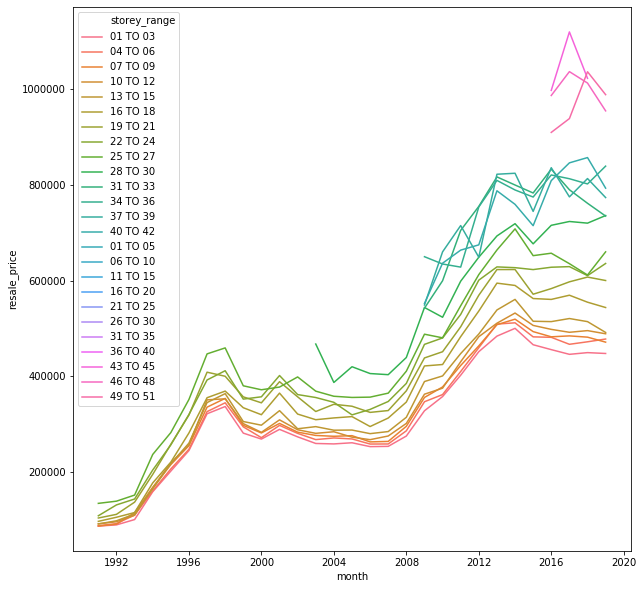

In [13]:
storey_resale = df_resale.groupby(['month', 'storey_range'])['resale_price', 'price_per_sqm'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.lineplot(data = storey_resale, x='month', y='resale_price', hue='storey_range', ax=ax)

# Break

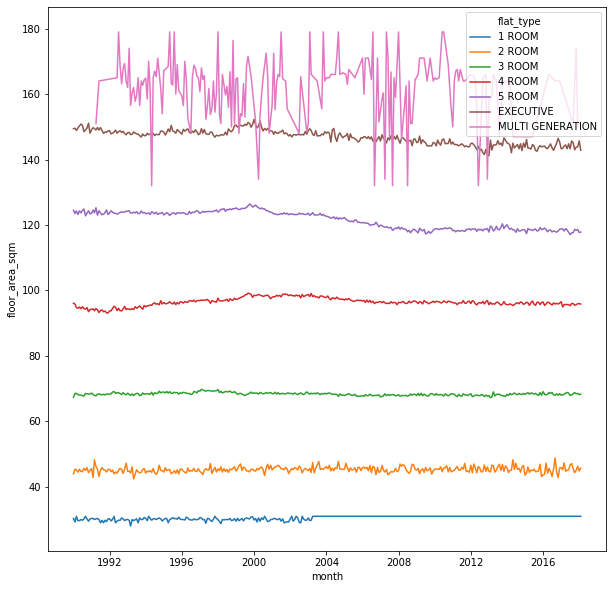

In [28]:
# Nope
a = df_resale_month.groupby(['month', 'flat_type'])['floor_area_sqm'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.lineplot(data=a, x='month', y='floor_area_sqm', hue='flat_type', ax=ax)

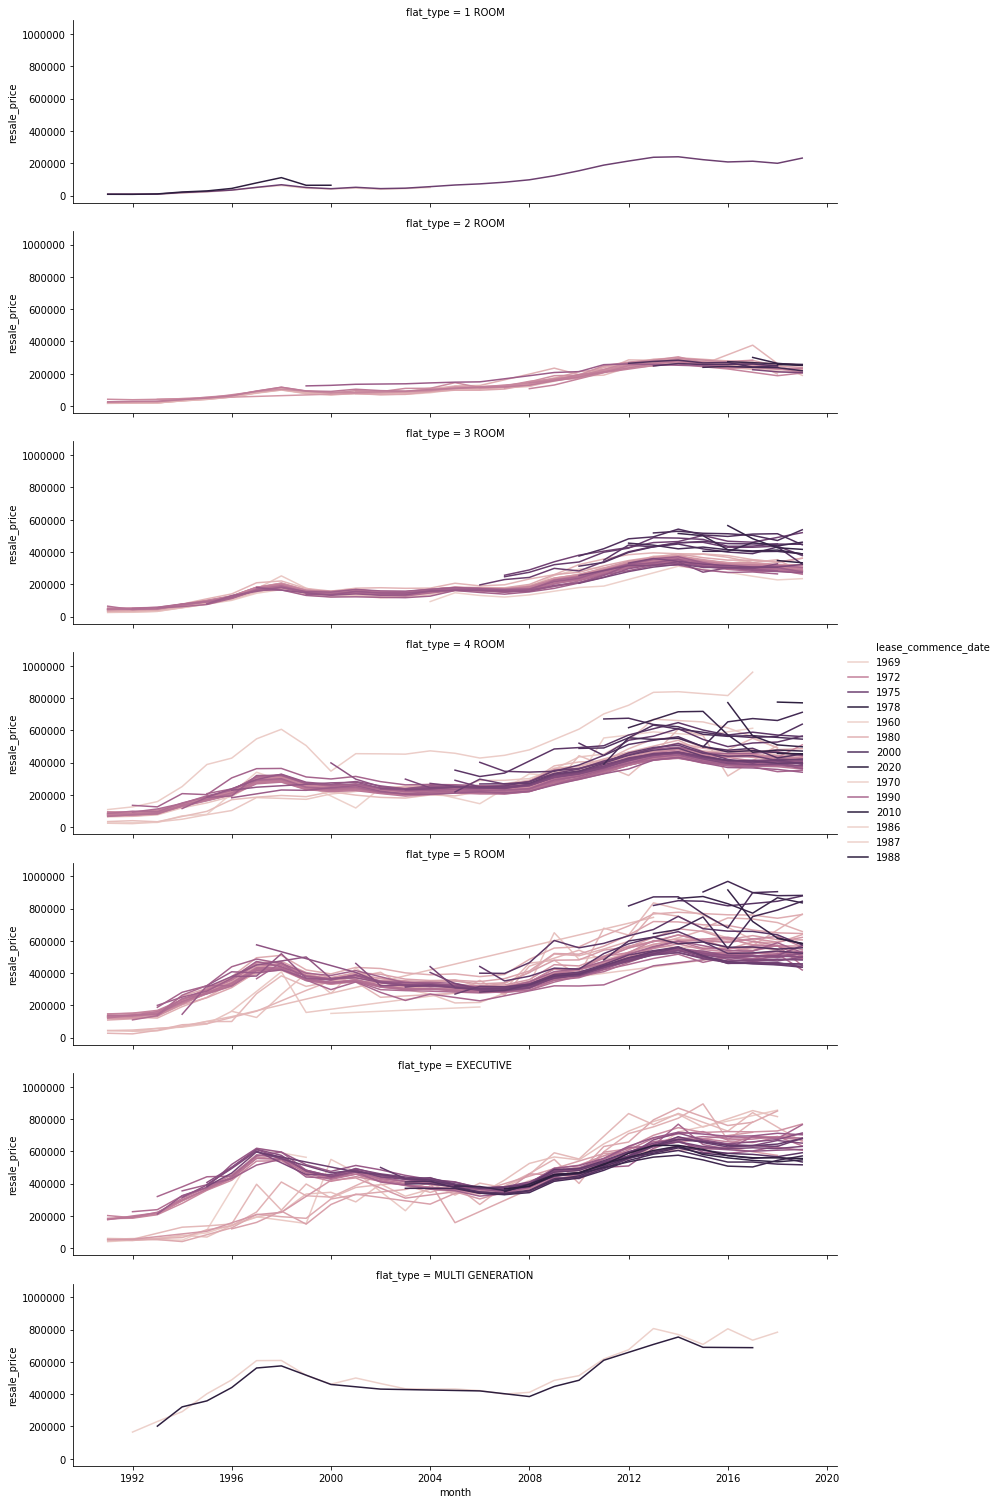

In [40]:
a = df_resale_month.groupby([pd.Grouper(freq='Y', key='month'), 'flat_type', 'lease_commence_date'])['resale_price'].mean().reset_index()
# a = a[a['lease_commence_date'] < 1980]
g = sns.FacetGrid(data=a, row='flat_type', aspect=4)
g.map(sns.lineplot, 'month', 'resale_price', 'lease_commence_date')
g.add_legend()

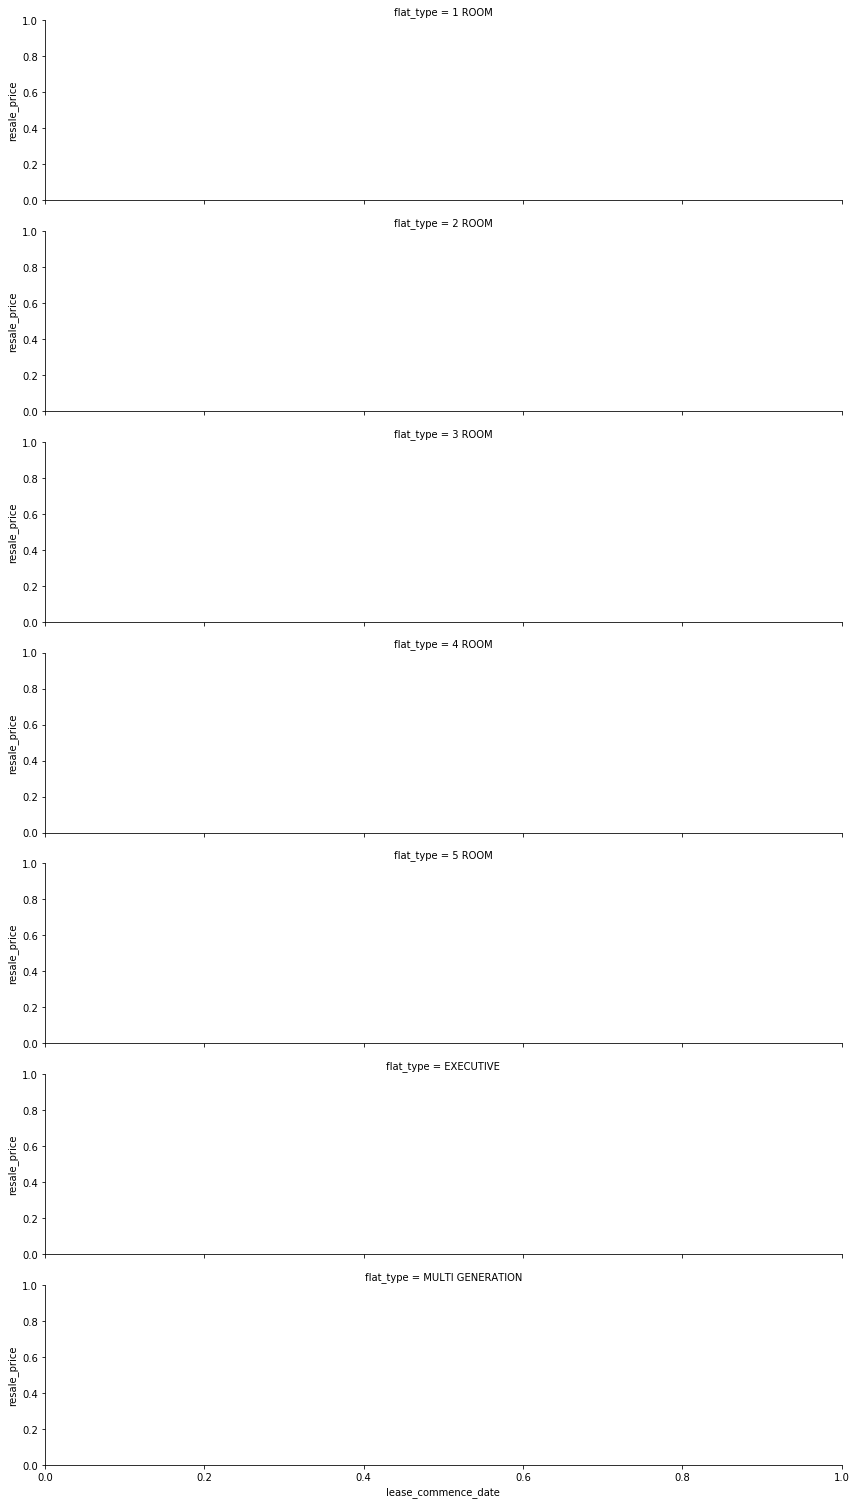

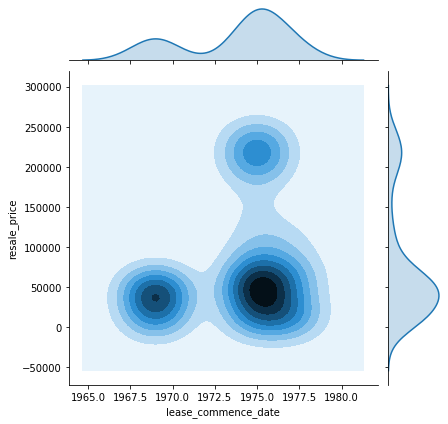

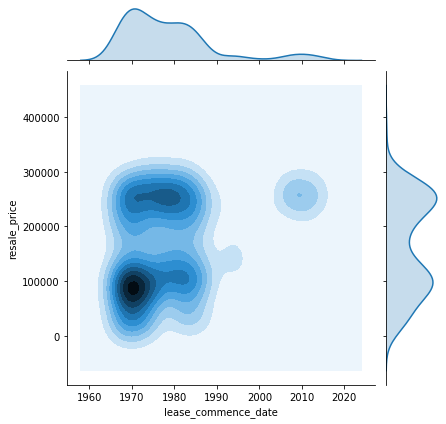

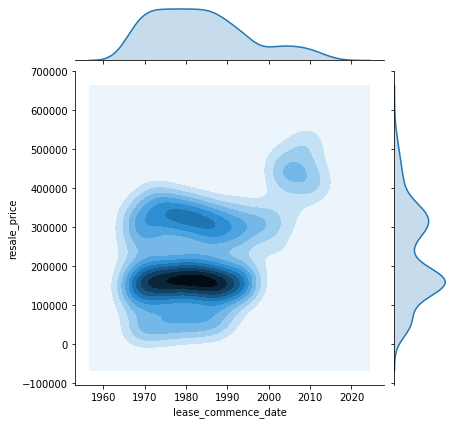

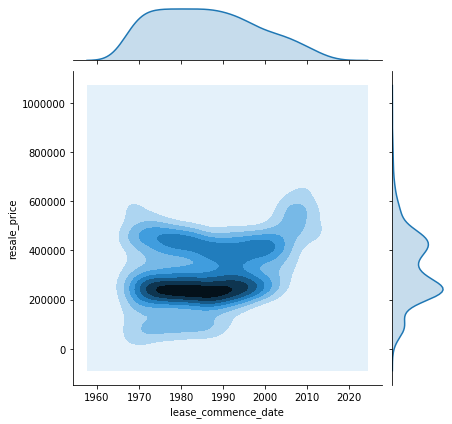

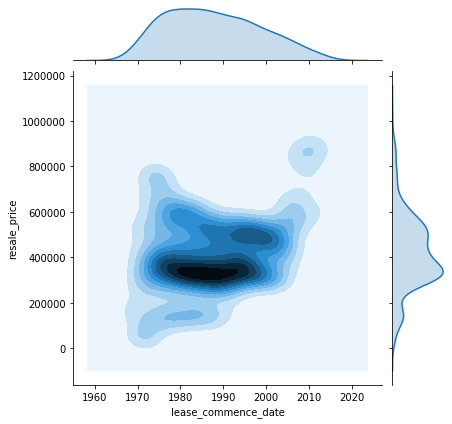

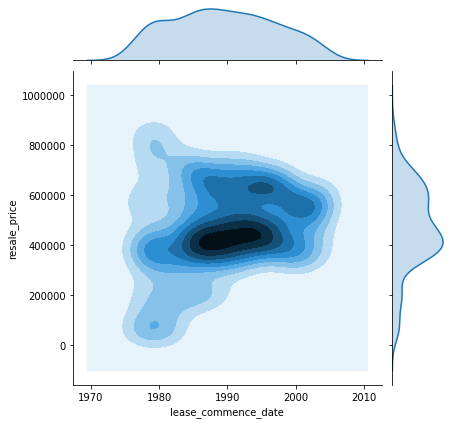

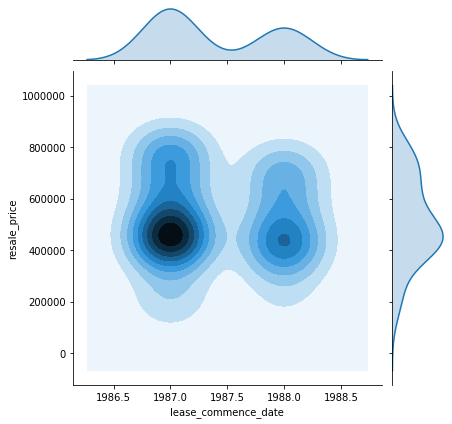

In [62]:
# sns.scatterplot(data=a, x='lease_commence_date', y='resale_price', hue='flat_type')

# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# for flat_type in a['flat_type'].unique():
#     df_mask_1 = a[a['flat_type'] == flat_type]
#     for lease_year in df_mask_1['lease_commence_date'].unique():
#         df_mask_2  = df_mask_1[df_mask_1['lease_commence_date'] == lease_year]
#         sns.kdeplot(df_mask_2['lease_commence_date'], df_mask_2['resale_price'])

g = sns.FacetGrid(data=a, row='flat_type', aspect=4)
g.map(sns.jointplot, 'lease_commence_date', 'resale_price', kind='kde')
# sns.kdeplot(a['lease_commence_date'], a['resale_price'], cmap='Reds')

# Break

In [15]:
results = ols('resale_price ~ C(town)', data=df_resale).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     39.81
Date:                Tue, 04 Feb 2020   Prob (F-statistic):          3.34e-196
Time:                        11:35:56   Log-Likelihood:            -2.7144e+05
No. Observations:               19976   AIC:                         5.429e+05
Df Residuals:                   19949   BIC:                         5.431e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3.427e+05   6336.064     54.089      0.000     3.3e+05    3.55e+05
C(town)[T.BEDOK]           -6509.8245   8910.786     -0.731      0.465    -2.4e+04     1.1e+04
C(town)[T.BISHAN]           1.261e+05   9050.606     13.931      0.000    1.08e+05    1.44e+05
C(town)[T.BUKIT BATOK]      1.559e+04   9127.905      1.708      0.088   -2302.735    3.35e+04
C(town)[T.BUKIT MERAH]      2415.4637   8628.170      0.280      0.780   -1.45e+04    1.93e+04
C(town)[T.BUKIT PANJANG]    1.235e+04   9360.230      1.320      0.187   -5995.094    3.07e+04
C(town)[T.BUKIT TIMAH]       9.57e+04   1.06e+04      9.015      0.000    7.49e+04    1.17e+05
C(town)[T.CENTRAL AREA]     1.713e+04   9373.224      1.828      0.068   -1240.176    3.55e+04
C(town)[T.CHOA CHU KANG]   -1.784e+04   9439.963     -1.890      0.059   -3.63e+04     666.115
C(town)[T.CLEMENTI]         6.835e+04   9296.941      7.352      0.000    5.01e+04    8.66e+04
C(town)[T.GEYLANG]          -539.6583   9100.744     -0.059      0.953   -1.84e+04    1.73e+04
C(town)[T.HOUGANG]         -3264.0377   9695.491     -0.337      0.736   -2.23e+04    1.57e+04
C(town)[T.JURONG EAST]      9332.4527   9275.429      1.006      0.314   -8848.157    2.75e+04
C(town)[T.JURONG WEST]     -5.087e+04   9053.198     -5.620      0.000   -6.86e+04   -3.31e+04
C(town)[T.KALLANG/WHAMPOA]  1.978e+04   8698.061      2.274      0.023    2726.207    3.68e+04
C(town)[T.LIM CHU KANG]    -2.729e+05   3.64e+04     -7.502      0.000   -3.44e+05   -2.02e+05
C(town)[T.MARINE PARADE]    5.794e+04   1.01e+04      5.749      0.000    3.82e+04    7.77e+04
C(town)[T.PASIR RIS]        4.708e+04   1.07e+04      4.419      0.000    2.62e+04     6.8e+04
C(town)[T.PUNGGOL]          9.172e+04   1.28e+04      7.167      0.000    6.66e+04    1.17e+05
C(town)[T.QUEENSTOWN]       8.019e+04   8560.647      9.367      0.000    6.34e+04     9.7e+04
C(town)[T.SEMBAWANG]        2.014e+04    1.2e+04      1.680      0.093   -3362.287    4.36e+04
C(town)[T.SENGKANG]         4.649e+04   1.08e+04      4.312      0.000    2.54e+04    6.76e+04
C(town)[T.SERANGOON]        3991.1627   9807.777      0.407      0.684   -1.52e+04    2.32e+04
C(town)[T.TAMPINES]         2.734e+04   9687.472      2.822      0.005    8347.256    4.63e+04
C(town)[T.TOA PAYOH]        4.403e+04   8590.346      5.126      0.000    2.72e+04    6.09e+04
C(town)[T.WOODLANDS]        -5.55e+04   9556.967     -5.808      0.000   -7.42e+04   -3.68e+04
C(town)[T.YISHUN]          -2.123e+04   9636.300     -2.203      0.028   -4.01e+04   -2339.273
==============================================================================
Omnibus:                      682.141   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.

In [23]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df_resale['resale_price'], df_resale['town'])
mc_results = mc.tukeyhsd()
print(mc_results)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1          group2       meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------------------------
     ANG MO KIO           BEDOK   -6509.8245    0.9  -39453.3224   26433.6733  False
     ANG MO KIO          BISHAN  126085.1237  0.001   92624.7082  159545.5392   True
     ANG MO KIO     BUKIT BATOK   15588.7145    0.9  -18157.4779    49334.907  False
     ANG MO KIO     BUKIT MERAH    2415.4637    0.9  -29483.1905   34314.1179  False
     ANG MO KIO   BUKIT PANJANG    12351.733    0.9  -22253.3755   46956.8415  False
     ANG MO KIO     BUKIT TIMAH   95697.1843  0.001   56451.1477   134943.221   True
     ANG MO KIO    CENTRAL AREA   17132.1208    0.9  -17521.0278   51785.2694  False
     ANG MO KIO   CHOA CHU KANG  -17836.9953    0.9  -52736.8796    17062.889  False
     ANG MO KIO        CLEMENTI   68346.4886  0.001   33975.3633 

In [116]:
a = mc_results.summary()
a = a.as_html()
df = pd.read_html(a, header=0)[0]
# df.dtypes
# df[df['reject']].groupby(['group1'])['group2'].transform(lambda x: ','.join(x))
same = df[df['reject'] == False]
same.groupby(['group1'])['group2'].apply(lambda x: ','.join(x)).reset_index()

group1                                             group2
0        ANG MO KIO  BEDOK,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,CE...
1             BEDOK  BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,CENTRAL ...
2            BISHAN                                BUKIT TIMAH,PUNGGOL
3       BUKIT BATOK  BUKIT MERAH,BUKIT PANJANG,CENTRAL AREA,CHOA CH...
4       BUKIT MERAH  BUKIT PANJANG,CENTRAL AREA,CHOA CHU KANG,GEYLA...
5     BUKIT PANJANG  CENTRAL AREA,CHOA CHU KANG,GEYLANG,HOUGANG,JUR...
6       BUKIT TIMAH          CLEMENTI,MARINE PARADE,PUNGGOL,QUEENSTOWN
7      CENTRAL AREA  CHOA CHU KANG,GEYLANG,HOUGANG,JURONG EAST,KALL...
8     CHOA CHU KANG  GEYLANG,HOUGANG,JURONG EAST,JURONG WEST,SEMBAW...
9          CLEMENTI  MARINE PARADE,PASIR RIS,PUNGGOL,QUEENSTOWN,SEN...
10          GEYLANG  HOUGANG,JURONG EAST,KALLANG/WHAMPOA,SEMBAWANG,...
11          HOUGANG  JURONG EAST,KALLANG/WHAMPOA,SEMBAWANG,SERANGOO...
12      JURONG EAST  KALLANG/WHAMPOA,PASIR RIS,SEMBAWANG,SENGKANG,S...
13      JURONG WEST                                   WOODLANDS,YISHUN
14  KALLANG/WHAMPOA  PASIR RIS,SEMBAWANG,SENGKANG,SERANGOON,TAMPINE...
15    MARINE PARADE  PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKAN...
16        PASIR RIS  PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,TAMPINES...
17          PUNGGOL                                QUEENSTOWN,SENGKANG
18       QUEENSTOWN                                           SENGKANG
19        SEMBAWANG       SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,YISHUN
20         SENGKANG                                 TAMPINES,TOA PAYOH
21        SERANGOON                                    TAMPINES,YISHUN
22         TAMPINES                                          TOA PAYOH
23        WOODLANDS                                             YISHUN

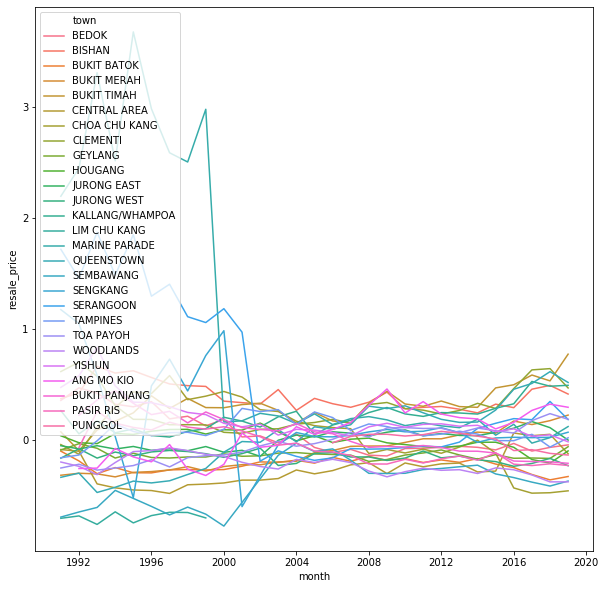

In [135]:
a = df_resale.groupby(['month', 'town'])['resale_price'].mean().pct_change().dropna().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.lineplot(x='month', y='resale_price', data=a, hue='town', ax=ax)

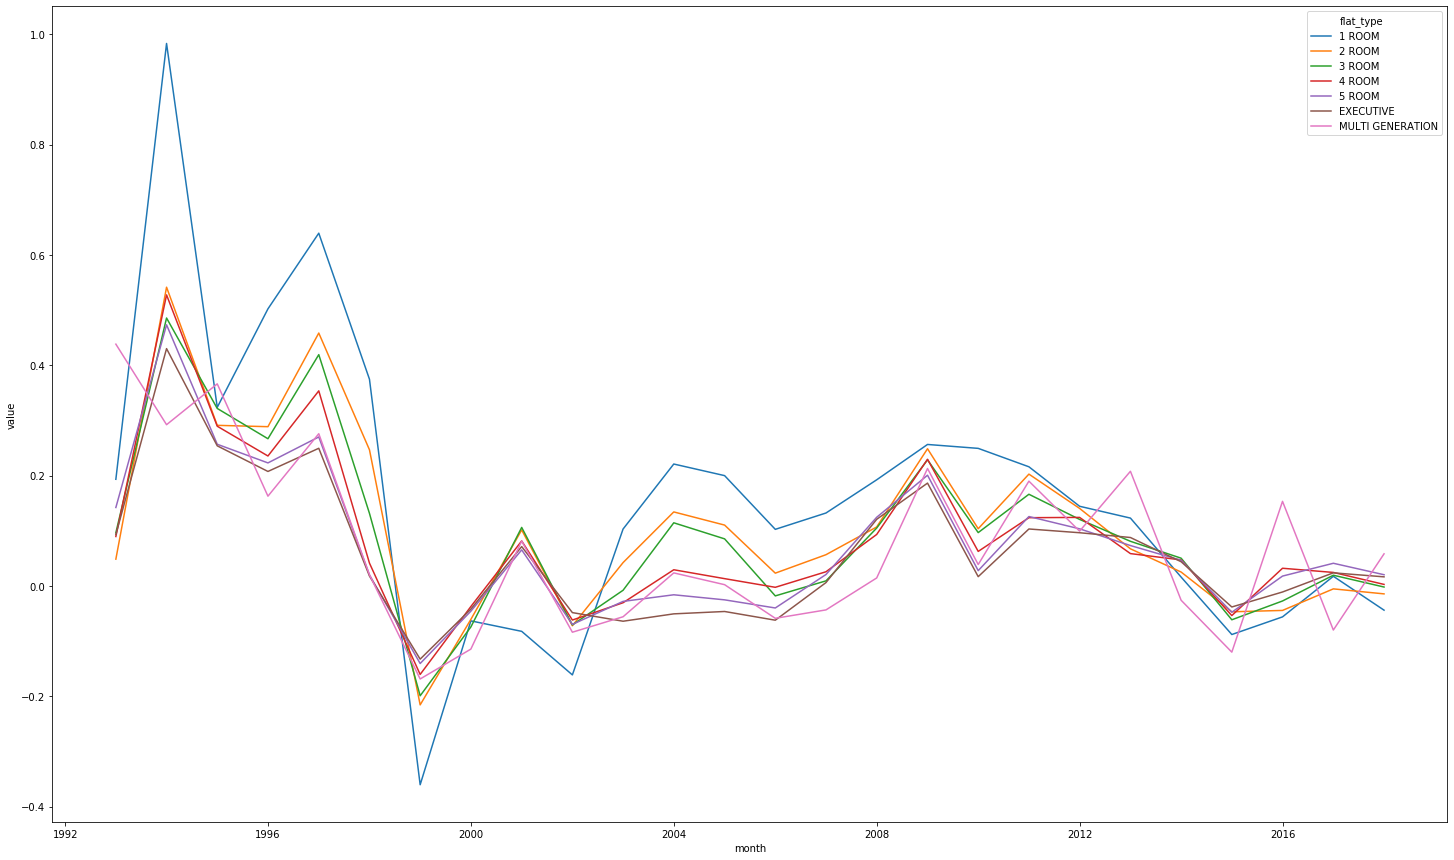

In [212]:
# a = df_resale.groupby(['month', 'flat_type'])['resale_price'].mean().reset_index().pivot(columns='flat_type', index='month').dropna().pct_change().dropna().reset_index().melt(id_vars=['flat_type', 'month'], value_vars='resale_price')
a = df_resale.groupby(['month', 'flat_type'])['resale_price'].mean().reset_index().pivot(columns='flat_type', index='month').dropna().pct_change().dropna().reset_index().melt(id_vars=['month']).drop([None], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
sns.lineplot(x='month', y='value', data=a, hue='flat_type', ax=ax)

/home/chuanhao01/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/chuanhao01/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


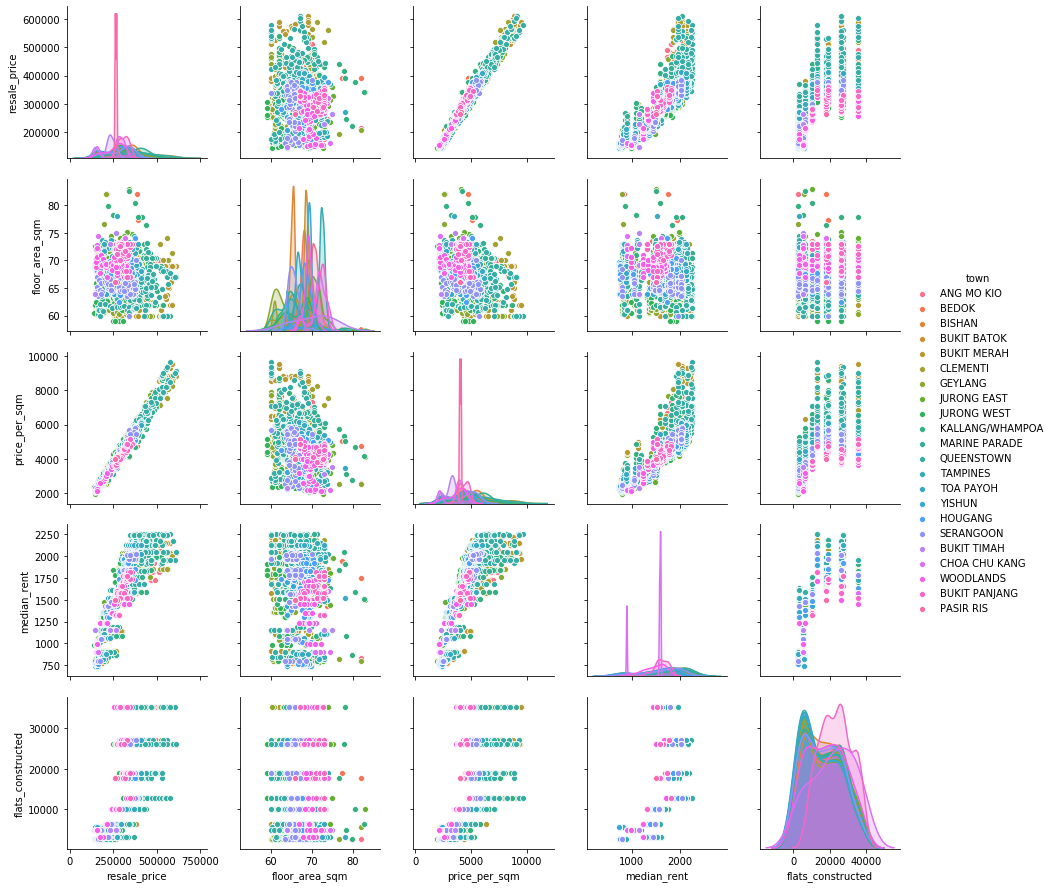

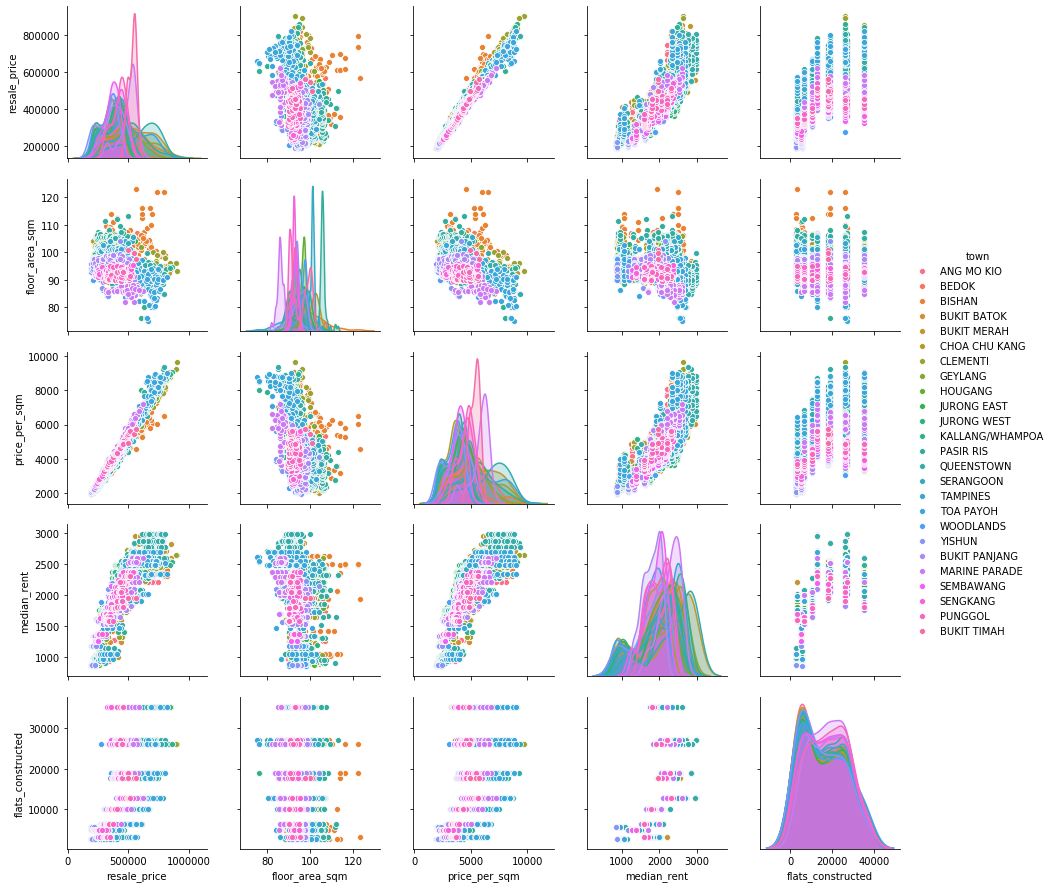

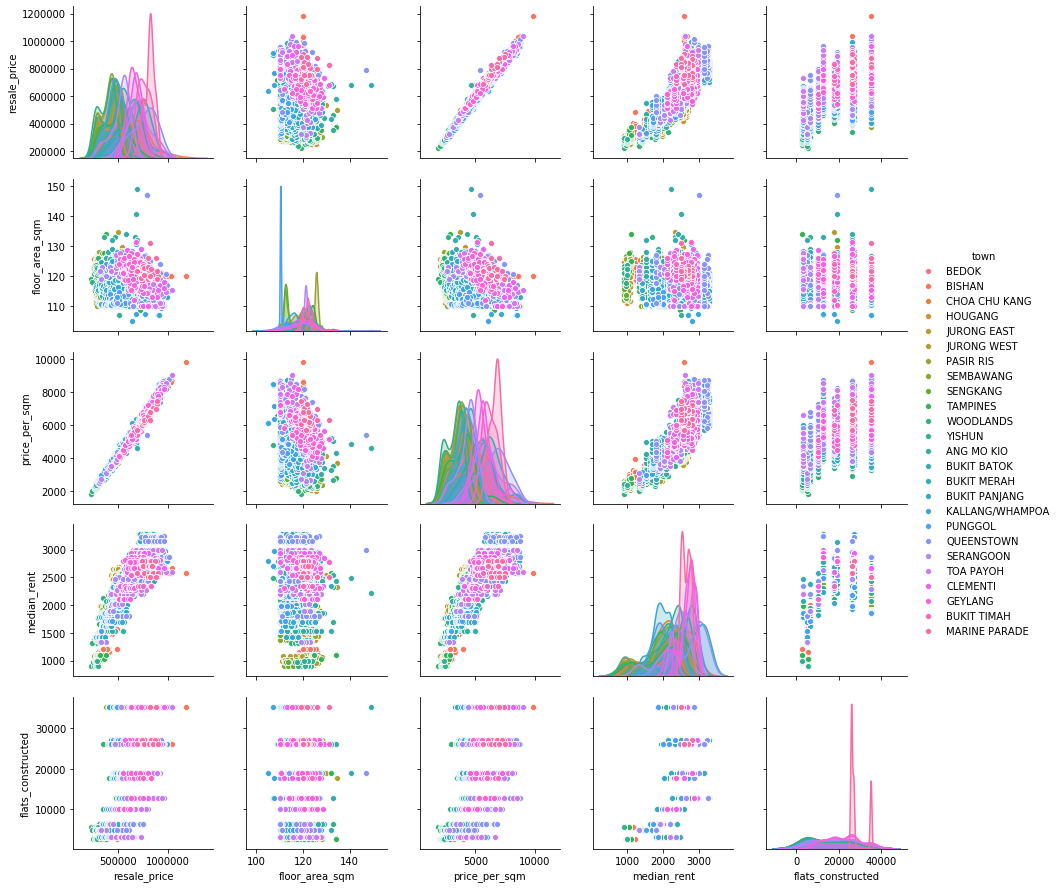

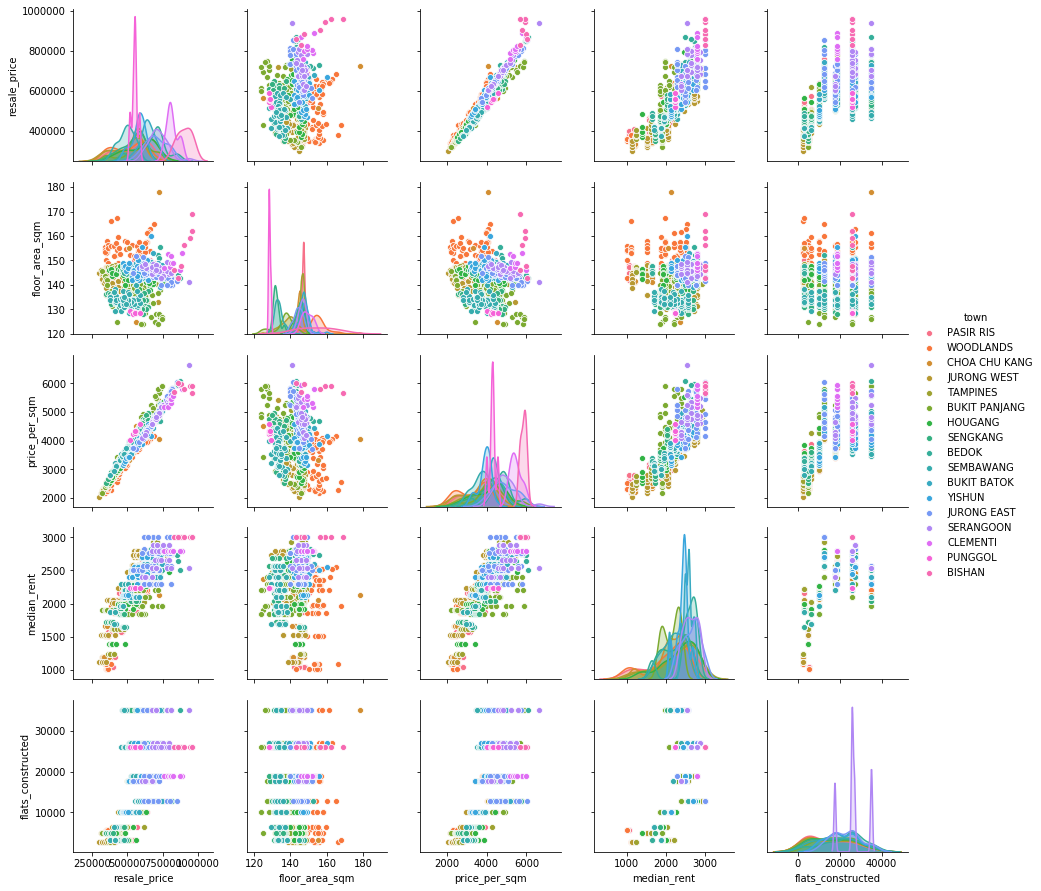

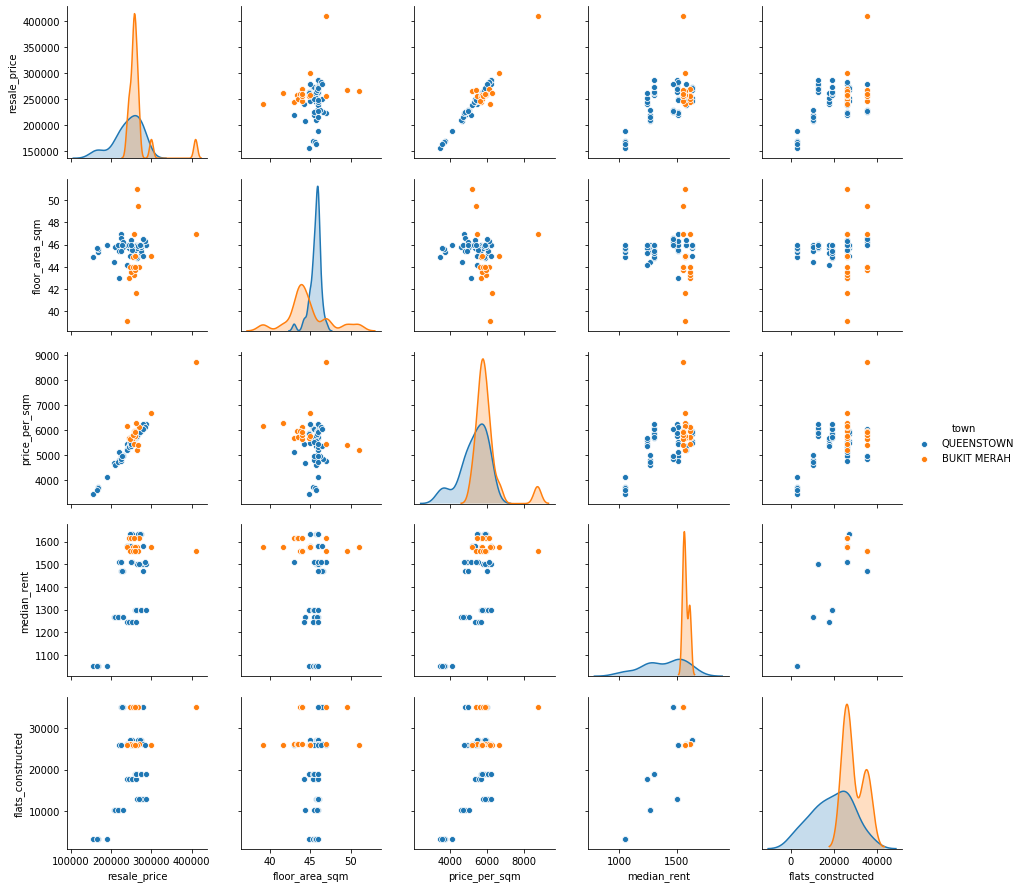

In [131]:
# grid = sns.pairplot(df_all, hue='town')
for i, flat_type in enumerate(df_all['flat_type'].unique()):
     grid = sns.pairplot(df_all[df_all['flat_type'] == flat_type], hue='town')